# Data collection

In [ ]:
import matplotlib.pyplot as plt
import socket
import time
import serial
# import robot_vlp.data.triad_openvr.triad_openvr as vr
import pandas as pd
import numpy as np
import robot_vlp.data_collection.communication as c
import os
import robot_vlp.modeling.gen_cnc_vlp_model as vlp
from tensorflow.keras.models import load_model
from robot_vlp.config import  MODELS_DIR
import robot_vlp.modeling.EKF as ekf

%load_ext autoreload
%autoreload 2


2025-04-13 10:50:40.744 | INFO     | robot_vlp.config:<module>:11 - PROJ_ROOT path is: /Users/tyrelglass/PhD/Repositories/robot-vlp


In [21]:
vive = c.vive_setup()

{'hmd_1': <robot_vlp.data.triad_openvr.triad_openvr.vr_tracked_device object at 0x0000018193EFA260>, 'tracker_1': <robot_vlp.data.triad_openvr.triad_openvr.vr_tracked_device object at 0x0000018193EF9960>, 'tracking_reference_1': <robot_vlp.data.triad_openvr.triad_openvr.vr_tracking_reference object at 0x0000018193EF9E40>, 'tracking_reference_2': <robot_vlp.data.triad_openvr.triad_openvr.vr_tracking_reference object at 0x0000018193EFA320>}


In [59]:
print(c.read_vive(vive, n_readings= 3) ) #test

[array(([[-0.46225896, -0.8858366 ,  0.04012636,  0.00619764], [ 0.00166411, -0.04611783, -0.9989346 , -0.79024637], [ 0.8867434 , -0.46169972,  0.02279251, -0.6765637 ]],),
      dtype=[('m', '<f4', (3, 4))]), array(([[-0.4620658 , -0.8859375 ,  0.04012403,  0.0062117 ], [ 0.0015    , -0.0460242 , -0.9989392 , -0.79022735], [ 0.8868444 , -0.46151543,  0.02259511, -0.67657477]],),
      dtype=[('m', '<f4', (3, 4))]), array(([[-0.46197736, -0.8859842 ,  0.04011114,  0.00625453], [ 0.00161426, -0.04606657, -0.9989371 , -0.79027617], [ 0.88689023, -0.46142158,  0.02271192, -0.6765979 ]],),
      dtype=[('m', '<f4', (3, 4))])]


In [29]:
# log_file = 'exp2_0.csv'
# c.vive_robot_log_clear(log_file= log_file)
c.take_vive_cal_point(point_no = 3, log_file = log_file, vive = vive)

In [30]:

df= pd.read_csv(log_file, delimiter = '|')
df = c.parse_vive(df)
transformer = c.ViveToRobotTransform()
transformer.derive_transform(df)

In [31]:
last_vive_point = c.get_last_vive_position(log_file)
transformed_point = transformer.transform_pose(c.add_bottom_row(last_vive_point))
vive_x, vive_y, vive_z , vive_pitch, vive_yaw, vive_roll = c.extract_pose_y_up(transformed_point)

vive_x, vive_y

(np.float64(0.8818928292362993), np.float64(-0.008833708906460735))

In [32]:
nano_response = c.send_command_to_nano('')
nano_response

Connected to ESP server at 192.168.10.102:8080
Response received: SETUP COMPLETE



'SETUP COMPLETE\r\n'

In [ ]:

nano_response = c.send_command_to_nano('TURN:-500')
nano_response
nano_response = c.send_command_to_nano('')

Connected to ESP server at 192.168.10.102:8080
Response received: Unknown command.

Connected to ESP server at 192.168.10.102:8080
Response received: Unknown command.



In [61]:
nano_response = c.send_command_to_nano('FORWARD:600')
nano_response
nano_response = c.send_command_to_nano('')

Connected to ESP server at 192.168.10.102:8080
Response received: Driving forward for 300 ms...

Connected to ESP server at 192.168.10.102:8080
Response received: Forward done



In [36]:
nano_response = c.send_command_to_nano('MOVE:3000')
nano_response
nano_response = c.send_command_to_nano('')

Connected to ESP server at 192.168.10.102:8080
Response received: Driving forward for 3000 ms...

Connected to ESP server at 192.168.10.102:8080
Response received: Forward done



In [35]:
c.read_n_vlp(3)

taking vlp readings:  0 1 2 

[[1858,
  1855,
  1843,
  1850,
  1856,
  1853,
  1867,
  1834,
  1856,
  1850,
  1852,
  1854,
  1840,
  1844,
  1848,
  1842,
  1823,
  1852,
  1846,
  1826,
  1840,
  1841,
  1844,
  1838,
  1835,
  1823,
  1830,
  1841,
  1844,
  1823,
  1825,
  1844,
  1838,
  1831,
  1846,
  1841,
  1832,
  1841,
  1838,
  1829,
  1841,
  1842,
  1816,
  1841,
  1854,
  1846,
  1834,
  1832,
  1843,
  1851,
  1837,
  1823,
  1798,
  1893,
  1922,
  1903,
  1912,
  1894,
  1883,
  1889,
  1860,
  1873,
  1860,
  1864,
  1825,
  1848,
  1864,
  1835,
  1847,
  1834,
  1838,
  1842,
  1815,
  1832,
  1832,
  1828,
  1847,
  1826,
  1828,
  1825,
  1831,
  1830,
  1823,
  1830,
  1814,
  1824,
  1835,
  1835,
  1847,
  1838,
  1835,
  1838,
  1835,
  1838,
  1836,
  1842,
  1843,
  1833,
  1836,
  1846,
  1846,
  1832,
  1840,
  1846,
  1831,
  1841,
  1842,
  1831,
  1836,
  1841,
  1827,
  1834,
  1839,
  1841,
  1842,
  1853,
  1832,
  1840,
  1847,
  1847,
  1830,
  1846,
  1856,
  1844,
  1847,


### Vive based data collection

In [ ]:
enc_per_degree = 11.34 /2
enc_per_cm = 89.08 /2


def calc_dist_to_target():
    return np.sqrt(np.square(target_x - x_hist[-1]) + np.square(target_y - y_hist[-1]))

def calc_ang_adjustment():
    x_d = target_x - x_hist[-1]
    y_d = target_y - y_hist[-1]
    ang_to_tar = np.arctan2(x_d, y_d)*180/np.pi
    ang_corr = ang_to_tar - heading_hist[-1]
    return c.normalize_angle(ang_corr)

def update_heading(ang_corr):
    encoder_corr = int(ang_corr * enc_per_degree)
    cmd = 'TURN:' + str(-int(encoder_corr))    # Have reversed the direction of turn!!!!!
    # print('sending message to robot: ', cmd)
    # print('angle of :', ang_corr)
    c.process_move_wifi(cmd, log_file, vive, transformer= None,vlp_read = False)

    x, y, heading = get_robot_location()
    x_hist.append(x)
    y_hist.append(y)
    heading_hist.append(heading)
    print_location()

def step(distance_m):
    encoder_counts = distance_m * enc_per_cm *100
    cmd = 'MOVE:'+str(encoder_counts)
  
    c.process_move_wifi(cmd, log_file, vive, transformer = None,vlp_read = True)

    x, y, heading = get_robot_location()
    x_hist.append(x)
    y_hist.append(y)
    heading_hist.append(heading)
    print_location()

def nav_to_point():

    while (True) :
        heading_corr = calc_ang_adjustment()
        if abs(heading_corr) > 5:
            update_heading(heading_corr)

        dist_to_target = calc_dist_to_target()
        step(0.1)

        if dist_to_target < 0.06:
            break    

def calculate_heading():
    x_d =  x_hist[-1] - x_hist[-2]
    y_d =  y_hist[-1] - y_hist[-2],
    new_heading = np.arctan2(x_d, y_d)[0]*180/np.pi
    return new_heading

def get_robot_location():
    last_vive_point = c.get_last_vive_position(log_file)
    transformed_point = transformer.transform_pose(c.add_bottom_row(last_vive_point))
    vive_x, vive_y, vive_z , vive_yaw, vive_pitch, vive_roll = c.extract_pose_y_up(transformed_point)

    robot_x = vive_x + 0.07*np.sin(vive_yaw/180*np.pi)
    robot_z = vive_z + 0.07*np.cos(vive_yaw/180*np.pi)

    return robot_x, robot_z, c.normalize_angle(vive_yaw + 180)

def print_location():
    print('x = ', x_hist[-1], ' y = ',y_hist[-1], ' heading = ',heading_hist[-1])

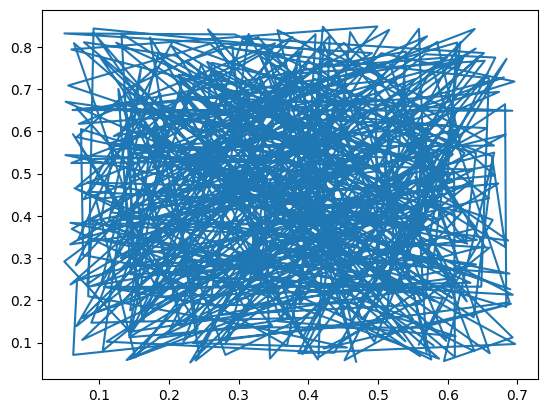

In [ ]:
# np.random.seed(42)  # exp3
# np.random.seed(43)  # exp4
# np.random.seed(44)  # exp5
# np.random.seed(45)  # exp6
# np.random.seed(46)  # exp7

def generate_random_points(num_points, x_range, y_range, min_distance):
    """
    Generates random points within specified x and y ranges,
    ensuring a minimum distance between consecutive points.
    
    Args:
        num_points (int): Number of points to generate.
        x_range (tuple): Tuple specifying the (lower, upper) limits for the x-coordinate.
        y_range (tuple): Tuple specifying the (lower, upper) limits for the y-coordinate.
        min_distance (float): Minimum distance between consecutive points.
    
    Returns:
        np.ndarray: Array of generated points with shape (num_points, 2).
    """
    x_lower, x_upper = x_range
    y_lower, y_upper = y_range

    # Initialize an empty list for the target points
    all_targets = []

    # Generate the first random point within the specified ranges
    x = np.random.uniform(x_lower, x_upper)
    y = np.random.uniform(y_lower, y_upper)
    all_targets.append([x, y])

    # Generate the remaining points
    while len(all_targets) < num_points:
        x = np.random.uniform(x_lower, x_upper)
        y = np.random.uniform(y_lower, y_upper)
        # Check the distance to the last point
        last_x, last_y = all_targets[-1]
        distance = np.sqrt((x - last_x)**2 + (y - last_y)**2)
        if distance >= min_distance:
            all_targets.append([x, y])

    # Convert to a numpy array
    return np.array(all_targets)

# Example usage
x_range = (0.05, 0.7)  # Lower and upper limits for x
y_range = (0.05, 0.85)   # Lower and upper limits for y
num_points = 500
min_distance = 0.1
np.random.seed(1)  # exp1_1
all_targets = generate_random_points(num_points, x_range, y_range, min_distance)

plt.plot(all_targets[:,0], all_targets[:,1])

In [30]:
x_hist = [0.1]
y_hist = [0.05]
heading_hist = [0]



moving to target:  0  at:  [0.3210643  0.62625959]
Connected to ESP server at 192.168.10.102:8080
Response received: Turning -110 encoder counts...

Turning -110 encoder counts...

Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

x =  0.002608530426160792  y =  0.010330279690645941  heading =  18.634600437461273
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 397 encoder counts...

Moving forward 397 encoder counts...

Connected to ESP server at 192.168.10.102:8080
Response received: Move done

taking vlp readings:  0 1 2 x =  0.03366605766786529  y =  0.10355653171451437  heading =  19.195848684834033
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 397 encoder counts...

Moving forward 397 encoder counts...

Connected to ESP server at 192.168.10.102:8080
Response received: Move done

taking vlp readings:  0 1 2 x =  0.06315816949972614  y =  0.1983178885970736  heading =  18.945348747444257
C

c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\numpy\_core\_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


AttributeError: 'float' object has no attribute 'dtype'

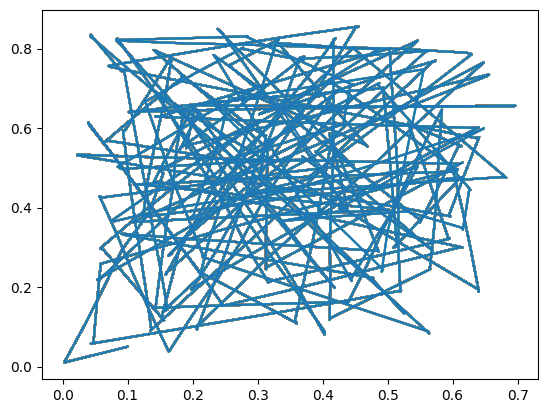

In [31]:
for reading in range(len(all_targets)):
    target = all_targets[reading]
    print('moving to target: ',reading, ' at: ',target)
    target_x= target[0]
    target_y = target[1]
    nav_to_point()
    plt.plot(x_hist, y_hist)


# Live model navigation

In [1]:
import matplotlib.pyplot as plt
import socket
import time
import serial
# import robot_vlp.data.triad_openvr.triad_openvr as vr
import pandas as pd
import numpy as np
import robot_vlp.data_collection.communication as c
import os
import robot_vlp.modeling.gen_cnc_vlp_model as vlp
from tensorflow.keras.models import load_model
from robot_vlp.config import  MODELS_DIR
import robot_vlp.modeling.EKF as ekf

%load_ext autoreload
%autoreload 2

2025-04-29 19:24:15.662 | INFO     | robot_vlp.config:<module>:11 - PROJ_ROOT path is: S:\robot_vlp\robot-vlp


In [2]:
vive = c.vive_setup()

{'hmd_1': <robot_vlp.data.triad_openvr.triad_openvr.vr_tracked_device object at 0x000001E0B945D630>, 'tracker_1': <robot_vlp.data.triad_openvr.triad_openvr.vr_tracked_device object at 0x000001E0B945D8D0>, 'tracking_reference_1': <robot_vlp.data.triad_openvr.triad_openvr.vr_tracking_reference object at 0x000001E0B945D2D0>, 'tracking_reference_2': <robot_vlp.data.triad_openvr.triad_openvr.vr_tracking_reference object at 0x000001E0B945D300>}


In [3]:
print(c.read_vive(vive, n_readings= 3) ) #test

[array(([[-0.540014  ,  0.8413799 , -0.02155885, -0.07069177], [ 0.00642281, -0.02149449, -0.99974835, -0.7995339 ], [-0.84163153, -0.54001653,  0.00620328, -0.35869214]],),
      dtype=[('m', '<f4', (3, 4))]), array(([[-0.53999156,  0.8414002 , -0.02132675, -0.07204323], [ 0.00610971, -0.02141939, -0.9997519 , -0.7994307 ], [-0.8416483 , -0.53998786,  0.00642557, -0.3578759 ]],),
      dtype=[('m', '<f4', (3, 4))]), array(([[-0.53958607,  0.8416419 , -0.02204225, -0.07349412], [ 0.00694933, -0.02172749, -0.99973977, -0.7994395 ], [-0.8419018 , -0.5395988 ,  0.00587499, -0.3570002 ]],),
      dtype=[('m', '<f4', (3, 4))])]


In [6]:
# log_file = 'exp2_0.csv'
# c.vive_robot_log_clear(log_file= log_file)
c.take_vive_cal_point(point_no = 3, log_file = log_file, vive = vive)

In [7]:

df= pd.read_csv(log_file, delimiter = '|')
df = c.parse_vive(df)
transformer = c.ViveToRobotTransform()
transformer.derive_transform(df)

In [11]:
nano_response = c.send_command_to_nano('')
nano_response

Connected to ESP server at 192.168.10.102:8080
Response received: Unknown command.



'Unknown command.\r\n'

In [12]:
nano_response = c.send_command_to_nano('TURN:500')
nano_response
nano_response = c.send_command_to_nano('')

Connected to ESP server at 192.168.10.102:8080
Response received: Turning 500 encoder counts...

Connected to ESP server at 192.168.10.102:8080
Response received: Turn done



In [40]:
c.read_n_vlp(3)

taking vlp readings:  0 1 2 

[[2234,
  1190,
  611,
  3024,
  1127,
  2512,
  1364,
  3459,
  460,
  3461,
  945,
  2889,
  656,
  1456,
  2840,
  685,
  3420,
  949,
  2653,
  1129,
  2942,
  754,
  2387,
  825,
  3212,
  439,
  1261,
  3341,
  491,
  3179,
  976,
  2949,
  599,
  3118,
  808,
  2610,
  1342,
  2994,
  524,
  1351,
  2866,
  964,
  2898,
  902,
  2838,
  521,
  3465,
  1032,
  2633,
  1001,
  2922,
  1239,
  635,
  2896,
  1031,
  2490,
  1358,
  3434,
  353,
  3416,
  875,
  2895,
  656,
  2540,
  2076,
  659,
  3410,
  1006,
  2584,
  1184,
  2961,
  782,
  2614,
  846,
  3137,
  351,
  1878,
  3347,
  583,
  3174,
  909,
  2783,
  605,
  3229,
  832,
  2584,
  1314,
  2974,
  514,
  1509,
  2792,
  875,
  2665,
  780,
  2827,
  535,
  3429,
  921,
  2498,
  1102,
  2789,
  1533,
  702,
  1952,
  237,
  1854,
  1040,
  4095,
  1373,
  4095,
  1451,
  3375,
  1048,
  2677,
  2567,
  830,
  3520,
  1156,
  2712,
  1182,
  2884,
  843,
  2635,
  0,
  1945,
  0,
  726,
  2571,
  1905,
  4095,
  171

In [27]:
import numpy as np

def gen_lawnmower_pattern(x_min, x_max, y_min, y_max, line_spacing, start_at='lower_left'):
    """
    Generate a lawn-mower (boustrophedon) path covering the rectangle
    [x_min, x_max] × [y_min, y_max].

    Parameters
    ----------
    x_min, x_max : float
        Horizontal bounds of the sweep.
    y_min, y_max : float
        Vertical bounds of the sweep.
    line_spacing : float
        Distance between adjacent parallel sweep lines (in same units as coords).
    start_at : {'lower_left','upper_left'}, default='lower_left'
        Which corner to start the first pass from.

    Returns
    -------
    waypoints : ndarray, shape (N,2)
        Sequence of (x,y) waypoints you can feed to your tracker.
    """
    # how many passes (plus maybe a partial last one)
    num_passes = int(np.ceil((y_max - y_min) / line_spacing)) + 1

    # build the list of y‐levels
    ys = np.linspace(y_min, y_min + line_spacing*(num_passes-1), num_passes)
    # clamp any that would exceed y_max
    ys = np.clip(ys, y_min, y_max)

    waypoints = []
    for i, y in enumerate(ys):
        # even rows go left→right, odd rows right→left
        if ((i % 2 == 0 and start_at == 'lower_left') or
            (i % 2 == 1 and start_at == 'upper_left')):
            waypoints.append([x_min, y])
            waypoints.append([x_max, y])
        else:
            waypoints.append([x_max, y])
            waypoints.append([x_min, y])

    return np.array(waypoints)

def gen_spiral_pattern(center_x=0, center_y=0,
                       spacing=0.11, max_radius=1.0,
                       oversample=10,
                       direction='ccw'):
    # “a” so that Δs≈spacing
    a = spacing/(2*np.pi)
    # how far θ must go to get out to max_radius: r = a θ ⇒ θ_max = max_radius/a
    θ_max = max_radius / a
    sign = +1 if direction=='ccw' else -1

    thetas = np.linspace(0, sign*θ_max, int(abs(θ_max)*oversample)+1)
    x = a*thetas*np.cos(thetas) + center_x
    y = a*thetas*np.sin(thetas) + center_y

    # re-sample to roughly constant spacing…
    dx, dy = np.diff(x), np.diff(y)
    dist = np.hypot(dx,dy)
    cumlen = np.concatenate([[0], np.cumsum(dist)])
    desired = np.arange(0, cumlen[-1], spacing)
    xs = np.interp(desired, cumlen, x)
    ys = np.interp(desired, cumlen, y)
    return np.column_stack([xs,ys])



def average_vive_matrix(list_of_matricies):
        list_of_matricies = [a['m'] for a in list_of_matricies]  #convert to normal array
        return np.mean(list_of_matricies, axis = 0)
def read_vive_gt():
    vive_data = c.read_vive(vive)
    vive_average = average_vive_matrix(vive_data)

    transformed_point = transformer.transform_pose(c.add_bottom_row(vive_average))
    vive_x, vive_y, vive_z , vive_yaw, vive_pitch, vive_roll = c.extract_pose_y_up(transformed_point)

    x = vive_x +0.07*np.sin(vive_yaw/180*np.pi) 
    y = vive_z +0.07*np.cos(vive_yaw/180*np.pi)

    heading = c.normalize_angle(vive_yaw + 180) 

    return x, y, heading

def run_vlp():
    vlp_readings =  c.read_n_vlp(3)
    pks = np.array([c.calc_pks(c.FFT_win(vlp_reading)[0]) for vlp_reading in vlp_readings])
    pks = np.mean(pks, axis = 0).reshape(1,-1)
    pre = vlp_model.predict(pks)
    x = pre[0][0]/1000
    y = pre[0][1]/1000
    return x, y


def init_df():
    df_columns =[
        'vlp_x', 
        'vlp_y',
        'vlp_heading',
        'vlp_heading_change', 
        'encoder_heading_change', 
        'encoder_heading',
        'encoder_x',
        'encoder_y',

        'rnn_x',
        'rnn_y',
        'rnn_heading',

        'ekf_x',
        'ekf_y',
        'ekf_heading',

        'real_x',
        'real_y',
        'real_heading'
        ]
    df = pd.DataFrame(columns = df_columns)

    reading = {}

    reading['real_x'] = 0
    reading['real_y'] = 0
    reading['real_heading'] = 0

    reading['rnn_x'] = 0
    reading['rnn_y'] = 0
    reading['rnn_heading'] = 0

    reading['ekf_x'] = 0
    reading['ekf_y'] = 0
    reading['ekf_heading'] = 0

    reading['vlp_x'] = 0
    reading['vlp_y'] = 0
    reading['vlp_heading'] = 0
    reading['vlp_heading_change'] = 0
    reading['encoder_heading_change']= 0
    reading['encoder_heading'] = 0
    reading['encoder_x'] = 0
    reading['encoder_y'] = 0

    df = pd.concat([df, pd.DataFrame([reading])], ignore_index=True)
    return df


def load_ekf():
    # Example initial state and covariance from your first measurement:
    initial_state = [0.0, 0.0, 0.0]  # [x, y, theta] (e.g., starting at origin)

    # Example error statistics (these would normally be computed off-line)
    err_stats = {
        'R_x': np.float64(0.0011877283113252916),
        'R_y': np.float64(0.001091556953648103),
        'R_theta': np.float64(0.04948532100320507),
        'Q_theta': np.float64(0.0002164107393016196),
        'Q_theta_no_turn': np.float64(4.006326132012649e-05),
        'Q_dist': np.float64(1.761140402328462e-06)
    }

    live_ekf = ekf.LiveEKF(initial_state, err_stats)
    return live_ekf

def update_stats(encoder_heading_change):
    global df

    encoder_location_change = 0.11175528785474013
    reading = {}
    # ======================== Calculate encoder data
    encoder_heading = c.normalize_angle(df['encoder_heading'].iloc[-1] + encoder_heading_change)

    dx = np.sin(encoder_heading/180*np.pi) * encoder_location_change
    dy = np.cos(encoder_heading/180*np.pi) * encoder_location_change

    reading['encoder_heading_change']= encoder_heading_change
    reading['encoder_heading'] = encoder_heading
    encoder_x = df['encoder_x'].iloc[-1] + dx
    encoder_y = df['encoder_y'].iloc[-1] + dy
    reading['encoder_x'] = encoder_x
    reading['encoder_y'] = encoder_y
    # ========================= Calculate vlp data
    vlp_x, vlp_y = run_vlp()


    reading['vlp_x'] = vlp_x
    reading['vlp_y'] = vlp_y

    pre_vlp_x = df['vlp_x'].iloc[-1]
    pre_vlp_y = df['vlp_y'].iloc[-1]

    vlp_heading = np.arctan2((vlp_x - pre_vlp_x), (vlp_y - pre_vlp_y)) * 180/ np.pi

    reading['vlp_heading'] = vlp_heading 
    vlp_heading_change = c.normalize_angle(vlp_heading - df['vlp_heading'].iloc[-1])
    reading['vlp_heading_change'] = vlp_heading_change
    # =======================   Calculate vive data
    vive_x, vive_y, vive_heading = read_vive_gt()

    reading['real_x'] = vive_x
    reading['real_y'] = vive_y
    reading['real_heading'] = vive_heading
    # ========================= Write reading data to df
    df = pd.concat([df, pd.DataFrame([reading])], ignore_index=True)
    # =========================== MODEL PREDICTIONS==============
    # ======================== RNN prediction 
    if len(df) >= 25:  # only if there are 25 readings
        X = df[['vlp_x', 'vlp_y','vlp_heading','vlp_heading_change', 'encoder_heading_change', 'encoder_heading', 'encoder_x','encoder_y']].iloc[-25:,:].to_numpy(dtype=np.float32)
        X[:, 2:6] = np.deg2rad(X[:, 2:6])
        pre_loc, pre_ang = rnn_mod.predict(np.expand_dims(X, axis=0))
        rnn_x = pre_loc[0][0]
        rnn_y = pre_loc[0][1]
        rnn_heading =  np.arctan2(pre_ang[:,0], pre_ang[:,1]) * 180/ np.pi
        

        df.iloc[-1, df.columns.get_loc('rnn_heading')] = rnn_heading
        df.iloc[-1, df.columns.get_loc('rnn_x')] = rnn_x
        df.iloc[-1, df.columns.get_loc('rnn_y')] = rnn_y
    # ======================== EKF prediction 
    ekf_pre = live_ekf.predict(
        d = encoder_location_change, 
        delta_theta= encoder_heading_change/180*np.pi, 
        z_meas = [vlp_x, vlp_y]
        )

    ekf_x = ekf_pre[0]
    ekf_y = ekf_pre[1]
    ekf_heading = ekf_pre[2]*180/np.pi

    df.iloc[-1, df.columns.get_loc('ekf_heading')] = ekf_heading
    df.iloc[-1, df.columns.get_loc('ekf_x')] = ekf_x
    df.iloc[-1, df.columns.get_loc('ekf_y')] = ekf_y

def get_cur_state(source = 'vive'):
    if source == 'vive':
        cur_x = df['real_x'].iloc[-1]
        cur_y = df['real_y'].iloc[-1]
        cur_heading = df['real_heading'].iloc[-1]
    elif source == 'encoder':
        cur_x = df['encoder_x'].iloc[-1]
        cur_y = df['encoder_y'].iloc[-1]
        cur_heading = df['encoder_heading'].iloc[-1]  
    elif source == 'rnn':
        cur_x = df['rnn_x'].iloc[-1]
        cur_y = df['rnn_y'].iloc[-1]
        cur_heading = df['rnn_heading'].iloc[-1]  
    elif source == 'ekf':
        cur_x = df['ekf_x'].iloc[-1]
        cur_y = df['ekf_y'].iloc[-1]
        cur_heading = df['ekf_heading'].iloc[-1]  
    return cur_x, cur_y, cur_heading

def calc_ang_adjustment(cur_x, cur_y, cur_heading, tar_x, tar_y):
    x_d = tar_x - cur_x
    y_d = tar_y - cur_y
    ang_to_tar = np.arctan2(x_d, y_d)*180/np.pi
    ang_corr = ang_to_tar - cur_heading
    return c.normalize_angle(ang_corr)

def check_if_target_reached(cur_x, cur_y, tar_x, tar_y):
    dist =  np.sqrt(np.square(tar_x - cur_x) + np.square(tar_y - cur_y))
    return dist < 0.07


def step():
    nano_response = c.send_command_to_nano('MOVE:445.2000000000001')
    print("moving")
    nano_response = c.send_command_to_nano('')
    print("moved")

def turn(ang):
    # ========================== converstion function ===========
    def ang_to_steps(angle):
        # Original lines
        acw_line = np.poly1d([ 0.1881481 , -0.83006664])
        cw_line  = np.poly1d([0.18953362, 1.00308782])

        # Inverse functions: (y - b) / a
        inv_acw_line = lambda y: (y - acw_line.coefficients[1]) / acw_line.coefficients[0]
        inv_cw_line  = lambda y: (y - cw_line.coefficients[1]) / cw_line.coefficients[0]
        if angle > 0:
            return inv_cw_line(angle)
        elif angle < 0:
            return inv_acw_line(angle)
        else:
            return 0
        
    # ===========================================================
        
    encoder_corr = int(ang_to_steps(ang))
    cmd = 'TURN:' + str(-int(encoder_corr))  # Have reversed the direction of turn!!!!!

    nano_response = c.send_command_to_nano(cmd)
    print(f"turn {ang}")
    nano_response = c.send_command_to_nano('')
    print("turn done")


def nav_to_point(tar_x, tar_y):
    while (True) :
        if len(df) < 25:
            cur_x, cur_y, cur_heading = get_cur_state('encoder')
        else:
            cur_x, cur_y, cur_heading = get_cur_state('encoder')

        if check_if_target_reached(cur_x, cur_y, tar_x, tar_y):
            break

        encoder_heading_change = calc_ang_adjustment(cur_x, cur_y, cur_heading, tar_x, tar_y)
        print(f"heading correction is : {encoder_heading_change}")
        if abs(encoder_heading_change) < 20:
            encoder_heading_change = 0
        
        turn(encoder_heading_change)
        step()

        update_stats(encoder_heading_change)


def plot_pattern(tar_pattern):
    plt.axhline(-0.14)
    plt.axhline(1.05)

    plt.axvline(-0.18)
    plt.axvline(0.92)

    plt.scatter(tar_pattern[:,0], tar_pattern[:,1])

def plot_path(x_lst, y_lst):
    plt.plot(x_lst, y_lst, marker = '.', c = 'g')

def gen_tar_pattern():
    # tar_pattern = np.array([
    #     [0.2, 0.25],
    #     [0.2, 0.8],
    #     [0.75, 0.8],
    #     [0.75, 0.25]
    # ])

    # tar_pattern = np.array([
    #     [0.05, 0.5],
    #     [0.7, 0.5],

    # ])

    # tar_pattern = np.array([
    #     [0.05, 0.25],
    #     [0.05, 0.75],
    #     [0.7, 0.25],
    #     [0.7, 0.75]
    # ])

    tar_pattern =  gen_spiral_pattern(
        center_x = 0.4,
        center_y = 0.45,
        spacing = 0.112,
        max_radius = 0.4,
        oversample = 10, 
        direction = 'ccw')
    return tar_pattern


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


moving to target:  0  at:  [0.4  0.45]
heading correction is : 41.6335393365702
Connected to ESP server at 192.168.10.102:8080
Response received: Turning -214 encoder counts...

turn 41.6335393365702
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


heading correction is : 0.0
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


heading correction is : 0.0
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


heading correction is : 0.0
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


heading correction is : 7.105427357601002e-15
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  1  at:  [0.34315686 0.446944  ]
moving to target:  2  at:  [0.40169432 0.36574255]
moving to target:  3  at:  [0.49719215 0.4102506 ]
heading correction is : 51.72142080595524
Connected to ESP server at 192.168.10.102:8080
Response received: Turning -267 encoder counts...

turn 51.72142080595524
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  4  at:  [0.50193907 0.51751494]
heading correction is : -83.15682871706036
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 437 encoder counts...

turn -83.15682871706036
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  5  at:  [0.41814574 0.58638831]
heading correction is : -62.47908208929863
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 327 encoder counts...

turn -62.47908208929863
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  6  at:  [0.31000773 0.57152759]
heading correction is : -47.4836611027128
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 247 encoder counts...

turn -47.4836611027128
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  7  at:  [0.24038897 0.48690113]
heading correction is : -42.94883987441165
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 223 encoder counts...

turn -42.94883987441165
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  8  at:  [0.24046369 0.37700925]
heading correction is : -39.54318438664893
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 205 encoder counts...

turn -39.54318438664893
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  9  at:  [0.30640814 0.28881799]
heading correction is : -36.73960428253878
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 190 encoder counts...

turn -36.73960428253878
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  10  at:  [0.41092623 0.25352964]
heading correction is : -34.52779672013304
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 179 encoder counts...

turn -34.52779672013304
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  11  at:  [0.51812475 0.28038316]
heading correction is : -32.672670701637
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 169 encoder counts...

turn -32.672670701637
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  12  at:  [0.59604514 0.35896275]
heading correction is : -31.114773989590958
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 160 encoder counts...

turn -31.114773989590958
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  13  at:  [0.62455262 0.46601079]
heading correction is : -29.77703324590567
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 153 encoder counts...

turn -29.77703324590567
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  14  at:  [0.59848806 0.5738024 ]
heading correction is : -28.424267788871873
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 146 encoder counts...

turn -28.424267788871873
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  15  at:  [0.52522971 0.65713049]
heading correction is : -27.674397685192503
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.674397685192503
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  16  at:  [0.42253298 0.69915818]
heading correction is : -26.33261447526553
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 135 encoder counts...

turn -26.33261447526553
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  17  at:  [0.31171334 0.6923344 ]
heading correction is : -25.75146537229034
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 132 encoder counts...

turn -25.75146537229034
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  18  at:  [0.21392008 0.63962475]
heading correction is : -24.735927644584308
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 127 encoder counts...

turn -24.735927644584308
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  19  at:  [0.14628089 0.55136081]
heading correction is : -24.172925249188154
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 124 encoder counts...

turn -24.172925249188154
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  20  at:  [0.11970649 0.44331333]
heading correction is : -23.590962295611348
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 120 encoder counts...

turn -23.590962295611348
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


moving to target:  21  at:  [0.13730753 0.33341072]
heading correction is : -22.84573887676845
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 117 encoder counts...

turn -22.84573887676845
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
moving to target:  22  at:  [0.19559411 0.23858804]
heading correction is : -22.433373653792614
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 114 encoder counts...

turn -22.433373653792614
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
moving to target:  23  at:  [0.28493718 0.17226764]
heading correction is : -21.77894718403735
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 111 encoder counts...

turn -21.77894718403735
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  24  at:  [0.39225847 0.14282028]
heading correction is : -21.206235155077366
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 108 encoder counts...

turn -21.206235155077366
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  25  at:  [0.50308564 0.15368378]
heading correction is : -20.923094665679457
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 106 encoder counts...

turn -20.923094665679457
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
moving to target:  26  at:  [0.60302246 0.20279029]
heading correction is : -20.535204300887074
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 104 encoder counts...

turn -20.535204300887074
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  27  at:  [0.68021443 0.28309107]
heading correction is : -19.91837367601937
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  28  at:  [0.72575446 0.38476584]
heading correction is : -54.83242619394417
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 287 encoder counts...

turn -54.83242619394417
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  29  at:  [0.73487829 0.49580984]
heading correction is : -2.5949395244525704
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  30  at:  [0.7076469  0.60386279]
heading correction is : -21.57651262870212
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 110 encoder counts...

turn -21.57651262870212
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  31  at:  [0.64732871 0.69764624]
heading correction is : -16.431354158258387
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
moving to target:  32  at:  [0.56019338 0.76725999]
heading correction is : -46.409248029020546
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 242 encoder counts...

turn -46.409248029020546
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  33  at:  [0.455838   0.80651023]
heading correction is : -7.07217847816446
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  34  at:  [0.34449319 0.81205658]
heading correction is : -27.67833164963264
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.67833164963264
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  35  at:  [0.23663609 0.78384159]
heading correction is : -12.756702116775443
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  36  at:  [0.14200099 0.72488536]
heading correction is : -37.67630203187986
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 195 encoder counts...

turn -37.67630203187986
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  37  at:  [0.06874629 0.6408059 ]
heading correction is : -9.624655302603628
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
moving to target:  38  at:  [0.0228447  0.53914194]
heading correction is : -30.956467479358537
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 160 encoder counts...

turn -30.956467479358537
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  39  at:  [0.00773212 0.42856729]
heading correction is : -11.02148382647772
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  40  at:  [0.02463833 0.31821898]
heading correction is : -33.124537293099365
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 171 encoder counts...

turn -33.124537293099365
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  41  at:  [0.4  0.45]
heading correction is : -92.14032087986368
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 485 encoder counts...

turn -92.14032087986368
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
heading correction is : 0.0
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
heading correction is : 0.0
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  42  at:  [0.34315686 0.446944  ]
moving to target:  43  at:  [0.40169432 0.36574255]
heading correction is : 63.34440809624385
Connected to ESP server at 192.168.10.102:8080
Response received: Turning -328 encoder counts...

turn 63.34440809624385
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  44  at:  [0.49719215 0.4102506 ]
heading correction is : -86.87912793760256
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 457 encoder counts...

turn -86.87912793760256
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  45  at:  [0.50193907 0.51751494]
heading correction is : -56.11247100520359
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 293 encoder counts...

turn -56.11247100520359
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  46  at:  [0.41814574 0.58638831]
heading correction is : -53.18346087011679
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 278 encoder counts...

turn -53.18346087011679
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  47  at:  [0.31000773 0.57152759]
heading correction is : -46.711291405540805
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 243 encoder counts...

turn -46.711291405540805
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  48  at:  [0.24038897 0.48690113]
heading correction is : -42.40188625030038
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 220 encoder counts...

turn -42.40188625030038
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  49  at:  [0.24046369 0.37700925]
heading correction is : -39.24514196501451
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 204 encoder counts...

turn -39.24514196501451
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  50  at:  [0.30640814 0.28881799]
heading correction is : -36.54534052881286
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 189 encoder counts...

turn -36.54534052881286
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
moving to target:  51  at:  [0.41092623 0.25352964]
heading correction is : -34.398335660962346
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 178 encoder counts...

turn -34.398335660962346
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  52  at:  [0.51812475 0.28038316]
heading correction is : -32.5801659908484
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 168 encoder counts...

turn -32.5801659908484
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  53  at:  [0.59604514 0.35896275]
heading correction is : -31.04688987716139
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 160 encoder counts...

turn -31.04688987716139
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  54  at:  [0.62455262 0.46601079]
heading correction is : -29.725393127382233
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 153 encoder counts...

turn -29.725393127382233
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  55  at:  [0.59848806 0.5738024 ]
heading correction is : -28.382299940015116
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 146 encoder counts...

turn -28.382299940015116
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  56  at:  [0.52522971 0.65713049]
heading correction is : -27.645118602036632
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.645118602036632
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
moving to target:  57  at:  [0.42253298 0.69915818]
heading correction is : -26.303124102323693
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 135 encoder counts...

turn -26.303124102323693
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  58  at:  [0.31171334 0.6923344 ]
heading correction is : -25.732439044175464
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 132 encoder counts...

turn -25.732439044175464
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  59  at:  [0.21392008 0.63962475]
heading correction is : -24.716262018167697
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 126 encoder counts...

turn -24.716262018167697
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  60  at:  [0.14628089 0.55136081]
heading correction is : -24.159005657767466
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 123 encoder counts...

turn -24.159005657767466
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  61  at:  [0.11970649 0.44331333]
heading correction is : -23.578423230386875
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 120 encoder counts...

turn -23.578423230386875
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
moving to target:  62  at:  [0.13730753 0.33341072]
heading correction is : -22.833991217557582
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 116 encoder counts...

turn -22.833991217557582
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  63  at:  [0.19559411 0.23858804]
heading correction is : -22.424697444320714
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 114 encoder counts...

turn -22.424697444320714
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  64  at:  [0.28493718 0.17226764]
heading correction is : -21.770021981289574
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 111 encoder counts...

turn -21.770021981289574
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
moving to target:  65  at:  [0.39225847 0.14282028]
heading correction is : -21.1987246285928
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 108 encoder counts...

turn -21.1987246285928
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  66  at:  [0.50308564 0.15368378]
heading correction is : -20.9174195156711
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 106 encoder counts...

turn -20.9174195156711
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  67  at:  [0.60302246 0.20279029]
heading correction is : -20.529619047751794
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 104 encoder counts...

turn -20.529619047751794
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
moving to target:  68  at:  [0.68021443 0.28309107]
heading correction is : -19.91254913951184
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  69  at:  [0.72575446 0.38476584]
heading correction is : -54.85987785074957
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 287 encoder counts...

turn -54.85987785074957
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  70  at:  [0.73487829 0.49580984]
heading correction is : -2.5161986899715885
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  71  at:  [0.7076469  0.60386279]
heading correction is : -21.46546291255646
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 109 encoder counts...

turn -21.46546291255646
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  72  at:  [0.64732871 0.69764624]
heading correction is : -16.490133515806804
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  73  at:  [0.56019338 0.76725999]
heading correction is : -46.535689566997576
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 242 encoder counts...

turn -46.535689566997576
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  74  at:  [0.455838   0.80651023]
heading correction is : -6.995513863079566
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  75  at:  [0.34449319 0.81205658]
heading correction is : -27.553400679222136
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.553400679222136
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  76  at:  [0.23663609 0.78384159]
heading correction is : -12.790645604458803
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  77  at:  [0.14200099 0.72488536]
heading correction is : -37.75749543015195
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 196 encoder counts...

turn -37.75749543015195
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  78  at:  [0.06874629 0.6408059 ]
heading correction is : -9.587585330846196
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  79  at:  [0.0228447  0.53914194]
heading correction is : -30.9009604454576
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 159 encoder counts...

turn -30.9009604454576
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
moving to target:  80  at:  [0.00773212 0.42856729]
heading correction is : -11.027517031384036
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  81  at:  [0.02463833 0.31821898]
heading correction is : -33.14966088575727
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 171 encoder counts...

turn -33.14966088575727
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  82  at:  [0.4  0.45]
heading correction is : -92.13018290449747
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 485 encoder counts...

turn -92.13018290449747
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
heading correction is : 1.4210854715202004e-14
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
heading correction is : 1.4210854715202004e-14
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
moving to target:  83  at:  [0.34315686 0.446944  ]
moving to target:  84  at:  [0.40169432 0.36574255]
heading correction is : 63.341783063621136
Connected to ESP server at 192.168.10.102:8080
Response received: Turning -328 encoder counts...

turn 63.341783063621136
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  85  at:  [0.49719215 0.4102506 ]
heading correction is : -86.8509798513407
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 457 encoder counts...

turn -86.8509798513407
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  86  at:  [0.50193907 0.51751494]
heading correction is : -56.11392864412471
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 293 encoder counts...

turn -56.11392864412471
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  87  at:  [0.41814574 0.58638831]
heading correction is : -53.181200360413015
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 278 encoder counts...

turn -53.181200360413015
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  88  at:  [0.31000773 0.57152759]
heading correction is : -46.71034304952718
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 243 encoder counts...

turn -46.71034304952718
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  89  at:  [0.24038897 0.48690113]
heading correction is : -42.40137751098371
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 220 encoder counts...

turn -42.40137751098371
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  90  at:  [0.24046369 0.37700925]
heading correction is : -39.244837236398666
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 204 encoder counts...

turn -39.244837236398666
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  91  at:  [0.30640814 0.28881799]
heading correction is : -36.54513730863323
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 189 encoder counts...

turn -36.54513730863323
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
moving to target:  92  at:  [0.41092623 0.25352964]
heading correction is : -34.39819801935408
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 178 encoder counts...

turn -34.39819801935408
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  93  at:  [0.51812475 0.28038316]
heading correction is : -32.58006643849683
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 168 encoder counts...

turn -32.58006643849683
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  94  at:  [0.59604514 0.35896275]
heading correction is : -31.046816259221487
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 160 encoder counts...

turn -31.046816259221487
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  95  at:  [0.62455262 0.46601079]
heading correction is : -29.725336784836315
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 153 encoder counts...

turn -29.725336784836315
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  96  at:  [0.59848806 0.5738024 ]
heading correction is : -28.3822538992369
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 146 encoder counts...

turn -28.3822538992369
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  97  at:  [0.52522971 0.65713049]
heading correction is : -27.64508647854251
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.64508647854251
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  98  at:  [0.42253298 0.69915818]
heading correction is : -26.303091473720087
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 135 encoder counts...

turn -26.303091473720087
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  99  at:  [0.31171334 0.6923344 ]
heading correction is : -25.732418085149448
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 132 encoder counts...

turn -25.732418085149448
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  100  at:  [0.21392008 0.63962475]
heading correction is : -24.716240179698616
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 126 encoder counts...

turn -24.716240179698616
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  101  at:  [0.14628089 0.55136081]
heading correction is : -24.158990245364976
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 123 encoder counts...

turn -24.158990245364976
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  102  at:  [0.11970649 0.44331333]
heading correction is : -23.57840929220265
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 120 encoder counts...

turn -23.57840929220265
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  103  at:  [0.13730753 0.33341072]
heading correction is : -22.83397813953013
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 116 encoder counts...

turn -22.83397813953013
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  104  at:  [0.19559411 0.23858804]
heading correction is : -22.42468779742967
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 114 encoder counts...

turn -22.42468779742967
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  105  at:  [0.28493718 0.17226764]
heading correction is : -21.770012022148194
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 111 encoder counts...

turn -21.770012022148194
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  106  at:  [0.39225847 0.14282028]
heading correction is : -21.19871625282451
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 108 encoder counts...

turn -21.19871625282451
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  107  at:  [0.50308564 0.15368378]
heading correction is : -20.917413188791613
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 106 encoder counts...

turn -20.917413188791613
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  108  at:  [0.60302246 0.20279029]
heading correction is : -20.529612807242017
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 104 encoder counts...

turn -20.529612807242017
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  109  at:  [0.68021443 0.28309107]
heading correction is : -19.91254262459023
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
moving to target:  110  at:  [0.72575446 0.38476584]
heading correction is : -54.859908827365416
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 287 encoder counts...

turn -54.859908827365416
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  111  at:  [0.73487829 0.49580984]
heading correction is : -2.5161099946599847
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  112  at:  [0.7076469  0.60386279]
heading correction is : -21.46533776197981
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 109 encoder counts...

turn -21.46533776197981
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  113  at:  [0.64732871 0.69764624]
heading correction is : -16.490200047483256
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  114  at:  [0.56019338 0.76725999]
heading correction is : -46.53583234966135
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 242 encoder counts...

turn -46.53583234966135
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  115  at:  [0.455838   0.80651023]
heading correction is : -6.995427278471539
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  116  at:  [0.34449319 0.81205658]
heading correction is : -27.55325939098691
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.55325939098691
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  117  at:  [0.23663609 0.78384159]
heading correction is : -12.790684217043463
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  118  at:  [0.14200099 0.72488536]
heading correction is : -37.75758746717014
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 196 encoder counts...

turn -37.75758746717014
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  119  at:  [0.06874629 0.6408059 ]
heading correction is : -9.587543392901466
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  120  at:  [0.0228447  0.53914194]
heading correction is : -30.900897483992196
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 159 encoder counts...

turn -30.900897483992196
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  121  at:  [0.00773212 0.42856729]
heading correction is : -11.027524035676322
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
moving to target:  122  at:  [0.02463833 0.31821898]
heading correction is : -33.1496895069057
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 171 encoder counts...

turn -33.1496895069057
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  123  at:  [0.4  0.45]
heading correction is : -92.13017136889545
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 485 encoder counts...

turn -92.13017136889545
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
heading correction is : 0.0
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
heading correction is : 0.0
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  124  at:  [0.34315686 0.446944  ]
moving to target:  125  at:  [0.40169432 0.36574255]
heading correction is : 63.34178007920934
Connected to ESP server at 192.168.10.102:8080
Response received: Turning -328 encoder counts...

turn 63.34178007920934
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  126  at:  [0.49719215 0.4102506 ]
heading correction is : -86.85094829324373
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 457 encoder counts...

turn -86.85094829324373
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  127  at:  [0.50193907 0.51751494]
heading correction is : -56.11393030044002
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 293 encoder counts...

turn -56.11393030044002
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  128  at:  [0.41814574 0.58638831]
heading correction is : -53.181197824779474
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 278 encoder counts...

turn -53.181197824779474
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  129  at:  [0.31000773 0.57152759]
heading correction is : -46.71034198781922
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 243 encoder counts...

turn -46.71034198781922
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  130  at:  [0.24038897 0.48690113]
heading correction is : -42.40137694101031
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 220 encoder counts...

turn -42.40137694101031
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  131  at:  [0.24046369 0.37700925]
heading correction is : -39.24483689502722
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 204 encoder counts...

turn -39.24483689502722
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  132  at:  [0.30640814 0.28881799]
heading correction is : -36.54513708096346
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 189 encoder counts...

turn -36.54513708096346
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  133  at:  [0.41092623 0.25352964]
heading correction is : -34.398197865150905
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 178 encoder counts...

turn -34.398197865150905
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  134  at:  [0.51812475 0.28038316]
heading correction is : -32.58006632696453
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 168 encoder counts...

turn -32.58006632696453
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  135  at:  [0.59604514 0.35896275]
heading correction is : -31.046816176743846
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 160 encoder counts...

turn -31.046816176743846
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
moving to target:  136  at:  [0.62455262 0.46601079]
heading correction is : -29.72533672171255
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 153 encoder counts...

turn -29.72533672171255
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  137  at:  [0.59848806 0.5738024 ]
heading correction is : -28.382253847654624
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 146 encoder counts...

turn -28.382253847654624
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  138  at:  [0.52522971 0.65713049]
heading correction is : -27.645086442552667
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.645086442552667
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
moving to target:  139  at:  [0.42253298 0.69915818]
heading correction is : -26.303091437163744
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 135 encoder counts...

turn -26.303091437163744
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
moving to target:  140  at:  [0.31171334 0.6923344 ]
heading correction is : -25.732418061667772
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 132 encoder counts...

turn -25.732418061667772
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  141  at:  [0.21392008 0.63962475]
heading correction is : -24.716240155231162
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 126 encoder counts...

turn -24.716240155231162
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  142  at:  [0.14628089 0.55136081]
heading correction is : -24.15899022809748
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 123 encoder counts...

turn -24.15899022809748
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  143  at:  [0.11970649 0.44331333]
heading correction is : -23.578409276586626
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 120 encoder counts...

turn -23.578409276586626
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
moving to target:  144  at:  [0.13730753 0.33341072]
heading correction is : -22.833978124877603
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 116 encoder counts...

turn -22.833978124877603
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  145  at:  [0.19559411 0.23858804]
heading correction is : -22.42468778662169
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 114 encoder counts...

turn -22.42468778662169
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  146  at:  [0.28493718 0.17226764]
heading correction is : -21.770012010990058
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 111 encoder counts...

turn -21.770012010990058
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  147  at:  [0.39225847 0.14282028]
heading correction is : -21.198716243440458
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 108 encoder counts...

turn -21.198716243440458
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  148  at:  [0.50308564 0.15368378]
heading correction is : -20.91741318170307
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 106 encoder counts...

turn -20.91741318170307
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
moving to target:  149  at:  [0.60302246 0.20279029]
heading correction is : -20.529612800250334
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 104 encoder counts...

turn -20.529612800250334
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  150  at:  [0.68021443 0.28309107]
heading correction is : -19.912542617290853
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  151  at:  [0.72575446 0.38476584]
heading correction is : -54.85990886207128
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 287 encoder counts...

turn -54.85990886207128
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  152  at:  [0.73487829 0.49580984]
heading correction is : -2.5161098952864336
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  153  at:  [0.7076469  0.60386279]
heading correction is : -21.465337621762046
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 109 encoder counts...

turn -21.465337621762046
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  154  at:  [0.64732871 0.69764624]
heading correction is : -16.490200122025215
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
moving to target:  155  at:  [0.56019338 0.76725999]
heading correction is : -46.53583250963442
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 242 encoder counts...

turn -46.53583250963442
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  156  at:  [0.455838   0.80651023]
heading correction is : -6.995427181462503
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  157  at:  [0.34449319 0.81205658]
heading correction is : -27.55325923268788
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.55325923268788
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  158  at:  [0.23663609 0.78384159]
heading correction is : -12.790684260305284
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  159  at:  [0.14200099 0.72488536]
heading correction is : -37.75758757028859
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 196 encoder counts...

turn -37.75758757028859
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  160  at:  [0.06874629 0.6408059 ]
heading correction is : -9.587543345914185
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  161  at:  [0.0228447  0.53914194]
heading correction is : -30.90089741344991
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 159 encoder counts...

turn -30.90089741344991
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  162  at:  [0.00773212 0.42856729]
heading correction is : -11.027524043524124
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  163  at:  [0.02463833 0.31821898]
heading correction is : -33.14968953897312
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 171 encoder counts...

turn -33.14968953897312
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  164  at:  [0.4  0.45]
heading correction is : -92.1301713559709
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 485 encoder counts...

turn -92.1301713559709
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
heading correction is : 1.4210854715202004e-14
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
heading correction is : 0.0
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  165  at:  [0.34315686 0.446944  ]
moving to target:  166  at:  [0.40169432 0.36574255]
heading correction is : 63.341780075865614
Connected to ESP server at 192.168.10.102:8080
Response received: Turning -328 encoder counts...

turn 63.341780075865614
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  167  at:  [0.49719215 0.4102506 ]
heading correction is : -86.85094825788633
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 457 encoder counts...

turn -86.85094825788633
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  168  at:  [0.50193907 0.51751494]
heading correction is : -56.11393030229584
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 293 encoder counts...

turn -56.11393030229584
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  169  at:  [0.41814574 0.58638831]
heading correction is : -53.181197821938554
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 278 encoder counts...

turn -53.181197821938554
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  170  at:  [0.31000773 0.57152759]
heading correction is : -46.71034198662977
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 243 encoder counts...

turn -46.71034198662977
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  171  at:  [0.24038897 0.48690113]
heading correction is : -42.40137694037168
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 220 encoder counts...

turn -42.40137694037168
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  172  at:  [0.24046369 0.37700925]
heading correction is : -39.24483689464472
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 204 encoder counts...

turn -39.24483689464472
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  173  at:  [0.30640814 0.28881799]
heading correction is : -36.54513708070834
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 189 encoder counts...

turn -36.54513708070834
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  174  at:  [0.41092623 0.25352964]
heading correction is : -34.39819786497816
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 178 encoder counts...

turn -34.39819786497816
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  175  at:  [0.51812475 0.28038316]
heading correction is : -32.58006632683964
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 168 encoder counts...

turn -32.58006632683964
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
moving to target:  176  at:  [0.59604514 0.35896275]
heading correction is : -31.046816176651305
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 160 encoder counts...

turn -31.046816176651305
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  177  at:  [0.62455262 0.46601079]
heading correction is : -29.725336721641895
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 153 encoder counts...

turn -29.725336721641895
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  178  at:  [0.59848806 0.5738024 ]
heading correction is : -28.38225384759687
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 146 encoder counts...

turn -28.38225384759687
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  179  at:  [0.52522971 0.65713049]
heading correction is : -27.645086442512252
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.645086442512252
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  180  at:  [0.42253298 0.69915818]
heading correction is : -26.30309143712293
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 135 encoder counts...

turn -26.30309143712293
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  181  at:  [0.31171334 0.6923344 ]
heading correction is : -25.732418061641397
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 132 encoder counts...

turn -25.732418061641397
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  182  at:  [0.21392008 0.63962475]
heading correction is : -24.716240155203764
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 126 encoder counts...

turn -24.716240155203764
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  183  at:  [0.14628089 0.55136081]
heading correction is : -24.158990228078153
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 123 encoder counts...

turn -24.158990228078153
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  184  at:  [0.11970649 0.44331333]
heading correction is : -23.57840927656912
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 120 encoder counts...

turn -23.57840927656912
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  185  at:  [0.13730753 0.33341072]
heading correction is : -22.833978124861176
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 116 encoder counts...

turn -22.833978124861176
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
moving to target:  186  at:  [0.19559411 0.23858804]
heading correction is : -22.42468778660958
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 114 encoder counts...

turn -22.42468778660958
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  187  at:  [0.28493718 0.17226764]
heading correction is : -21.770012010977496
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 111 encoder counts...

turn -21.770012010977496
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  188  at:  [0.39225847 0.14282028]
heading correction is : -21.19871624343
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 108 encoder counts...

turn -21.19871624343
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  189  at:  [0.50308564 0.15368378]
heading correction is : -20.91741318169511
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 106 encoder counts...

turn -20.91741318169511
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  190  at:  [0.60302246 0.20279029]
heading correction is : -20.52961280024249
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 104 encoder counts...

turn -20.52961280024249
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  191  at:  [0.68021443 0.28309107]
heading correction is : -19.912542617282725
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  192  at:  [0.72575446 0.38476584]
heading correction is : -54.859908862110274
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 287 encoder counts...

turn -54.859908862110274
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  193  at:  [0.73487829 0.49580984]
heading correction is : -2.5161098951750205
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  194  at:  [0.7076469  0.60386279]
heading correction is : -21.46533762160476
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 109 encoder counts...

turn -21.46533762160476
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  195  at:  [0.64732871 0.69764624]
heading correction is : -16.49020012210883
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  196  at:  [0.56019338 0.76725999]
heading correction is : -46.535832509813815
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 242 encoder counts...

turn -46.535832509813815
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  197  at:  [0.455838   0.80651023]
heading correction is : -6.995427181353762
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  198  at:  [0.34449319 0.81205658]
heading correction is : -27.553259232510413
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.553259232510413
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  199  at:  [0.23663609 0.78384159]
heading correction is : -12.790684260353657
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
moving to target:  200  at:  [0.14200099 0.72488536]
heading correction is : -37.7575875704041
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 196 encoder counts...

turn -37.7575875704041
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  201  at:  [0.06874629 0.6408059 ]
heading correction is : -9.58754334586149
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  202  at:  [0.0228447  0.53914194]
heading correction is : -30.9008974133709
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 159 encoder counts...

turn -30.9008974133709
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  203  at:  [0.00773212 0.42856729]
heading correction is : -11.027524043532935
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  204  at:  [0.02463833 0.31821898]
heading correction is : -33.1496895390091
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 171 encoder counts...

turn -33.1496895390091
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  205  at:  [0.4  0.45]
heading correction is : -92.1301713559564
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 485 encoder counts...

turn -92.1301713559564
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
heading correction is : 1.4210854715202004e-14
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
heading correction is : 1.4210854715202004e-14
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  206  at:  [0.34315686 0.446944  ]
moving to target:  207  at:  [0.40169432 0.36574255]
heading correction is : 63.341780075861834
Connected to ESP server at 192.168.10.102:8080
Response received: Turning -328 encoder counts...

turn 63.341780075861834
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
moving to target:  208  at:  [0.49719215 0.4102506 ]
heading correction is : -86.85094825784665
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 457 encoder counts...

turn -86.85094825784665
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
moving to target:  209  at:  [0.50193907 0.51751494]
heading correction is : -56.113930302297945
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 293 encoder counts...

turn -56.113930302297945
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  210  at:  [0.41814574 0.58638831]
heading correction is : -53.181197821935314
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 278 encoder counts...

turn -53.181197821935314
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  211  at:  [0.31000773 0.57152759]
heading correction is : -46.710341986628464
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 243 encoder counts...

turn -46.710341986628464
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  212  at:  [0.24038897 0.48690113]
heading correction is : -42.40137694037094
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 220 encoder counts...

turn -42.40137694037094
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  213  at:  [0.24046369 0.37700925]
heading correction is : -39.24483689464432
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 204 encoder counts...

turn -39.24483689464432
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  214  at:  [0.30640814 0.28881799]
heading correction is : -36.54513708070806
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 189 encoder counts...

turn -36.54513708070806
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  215  at:  [0.41092623 0.25352964]
heading correction is : -34.398197864978044
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 178 encoder counts...

turn -34.398197864978044
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  216  at:  [0.51812475 0.28038316]
heading correction is : -32.580066326839415
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 168 encoder counts...

turn -32.580066326839415
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  217  at:  [0.59604514 0.35896275]
heading correction is : -31.04681617665119
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 160 encoder counts...

turn -31.04681617665119
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
moving to target:  218  at:  [0.62455262 0.46601079]
heading correction is : -29.725336721641952
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 153 encoder counts...

turn -29.725336721641952
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  219  at:  [0.59848806 0.5738024 ]
heading correction is : -28.382253847596644
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 146 encoder counts...

turn -28.382253847596644
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
moving to target:  220  at:  [0.52522971 0.65713049]
heading correction is : -27.64508644251231
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.64508644251231
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  221  at:  [0.42253298 0.69915818]
heading correction is : -26.30309143712276
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 135 encoder counts...

turn -26.30309143712276
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  222  at:  [0.31171334 0.6923344 ]
heading correction is : -25.732418061641454
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 132 encoder counts...

turn -25.732418061641454
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  223  at:  [0.21392008 0.63962475]
heading correction is : -24.716240155203707
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 126 encoder counts...

turn -24.716240155203707
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  224  at:  [0.14628089 0.55136081]
heading correction is : -24.158990228078096
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 123 encoder counts...

turn -24.158990228078096
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  225  at:  [0.11970649 0.44331333]
heading correction is : -23.57840927656912
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 120 encoder counts...

turn -23.57840927656912
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
moving to target:  226  at:  [0.13730753 0.33341072]
heading correction is : -22.833978124861233
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 116 encoder counts...

turn -22.833978124861233
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  227  at:  [0.19559411 0.23858804]
heading correction is : -22.424687786609525
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 114 encoder counts...

turn -22.424687786609525
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  228  at:  [0.28493718 0.17226764]
heading correction is : -21.770012010977496
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 111 encoder counts...

turn -21.770012010977496
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  229  at:  [0.39225847 0.14282028]
heading correction is : -21.198716243429942
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 108 encoder counts...

turn -21.198716243429942
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  230  at:  [0.50308564 0.15368378]
heading correction is : -20.91741318169511
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 106 encoder counts...

turn -20.91741318169511
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  231  at:  [0.60302246 0.20279029]
heading correction is : -20.529612800242546
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 104 encoder counts...

turn -20.529612800242546
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  232  at:  [0.68021443 0.28309107]
heading correction is : -19.912542617282668
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  233  at:  [0.72575446 0.38476584]
heading correction is : -54.859908862110274
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 287 encoder counts...

turn -54.859908862110274
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  234  at:  [0.73487829 0.49580984]
heading correction is : -2.51610989517485
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  235  at:  [0.7076469  0.60386279]
heading correction is : -21.46533762160459
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 109 encoder counts...

turn -21.46533762160459
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  236  at:  [0.64732871 0.69764624]
heading correction is : -16.490200122108945
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  237  at:  [0.56019338 0.76725999]
heading correction is : -46.53583250981404
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 242 encoder counts...

turn -46.53583250981404
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
moving to target:  238  at:  [0.455838   0.80651023]
heading correction is : -6.995427181353591
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
moving to target:  239  at:  [0.34449319 0.81205658]
heading correction is : -27.553259232510186
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.553259232510186
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  240  at:  [0.23663609 0.78384159]
heading correction is : -12.790684260353771
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  241  at:  [0.14200099 0.72488536]
heading correction is : -37.757587570404326
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 196 encoder counts...

turn -37.757587570404326
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  242  at:  [0.06874629 0.6408059 ]
heading correction is : -9.587543345861377
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  243  at:  [0.0228447  0.53914194]
heading correction is : -30.900897413370615
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 159 encoder counts...

turn -30.900897413370615
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  244  at:  [0.00773212 0.42856729]
heading correction is : -11.027524043533106
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  245  at:  [0.02463833 0.31821898]
heading correction is : -33.14968953900939
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 171 encoder counts...

turn -33.14968953900939
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  246  at:  [0.4  0.45]
heading correction is : -92.13017135595624
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 485 encoder counts...

turn -92.13017135595624
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
heading correction is : 4.263256414560601e-14
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
heading correction is : 8.526512829121202e-14
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  247  at:  [0.34315686 0.446944  ]
moving to target:  248  at:  [0.40169432 0.36574255]
heading correction is : 63.34178007586195
Connected to ESP server at 192.168.10.102:8080
Response received: Turning -328 encoder counts...

turn 63.34178007586195
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  249  at:  [0.49719215 0.4102506 ]
heading correction is : -86.8509482578466
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 457 encoder counts...

turn -86.8509482578466
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  250  at:  [0.50193907 0.51751494]
heading correction is : -56.11393030229806
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 293 encoder counts...

turn -56.11393030229806
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
moving to target:  251  at:  [0.41814574 0.58638831]
heading correction is : -53.181197821935314
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 278 encoder counts...

turn -53.181197821935314
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  252  at:  [0.31000773 0.57152759]
heading correction is : -46.710341986628464
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 243 encoder counts...

turn -46.710341986628464
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  253  at:  [0.24038897 0.48690113]
heading correction is : -42.40137694037094
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 220 encoder counts...

turn -42.40137694037094
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
moving to target:  254  at:  [0.24046369 0.37700925]
heading correction is : -39.24483689464432
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 204 encoder counts...

turn -39.24483689464432
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  255  at:  [0.30640814 0.28881799]
heading correction is : -36.54513708070806
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 189 encoder counts...

turn -36.54513708070806
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  256  at:  [0.41092623 0.25352964]
heading correction is : -34.398197864978044
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 178 encoder counts...

turn -34.398197864978044
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  257  at:  [0.51812475 0.28038316]
heading correction is : -32.580066326839415
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 168 encoder counts...

turn -32.580066326839415
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  258  at:  [0.59604514 0.35896275]
heading correction is : -31.04681617665119
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 160 encoder counts...

turn -31.04681617665119
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  259  at:  [0.62455262 0.46601079]
heading correction is : -29.725336721641952
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 153 encoder counts...

turn -29.725336721641952
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
moving to target:  260  at:  [0.59848806 0.5738024 ]
heading correction is : -28.382253847596644
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 146 encoder counts...

turn -28.382253847596644
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
moving to target:  261  at:  [0.52522971 0.65713049]
heading correction is : -27.64508644251231
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.64508644251231
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  262  at:  [0.42253298 0.69915818]
heading correction is : -26.30309143712276
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 135 encoder counts...

turn -26.30309143712276
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  263  at:  [0.31171334 0.6923344 ]
heading correction is : -25.732418061641454
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 132 encoder counts...

turn -25.732418061641454
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  264  at:  [0.21392008 0.63962475]
heading correction is : -24.716240155203707
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 126 encoder counts...

turn -24.716240155203707
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  265  at:  [0.14628089 0.55136081]
heading correction is : -24.158990228078096
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 123 encoder counts...

turn -24.158990228078096
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  266  at:  [0.11970649 0.44331333]
heading correction is : -23.57840927656912
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 120 encoder counts...

turn -23.57840927656912
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  267  at:  [0.13730753 0.33341072]
heading correction is : -22.833978124861233
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 116 encoder counts...

turn -22.833978124861233
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  268  at:  [0.19559411 0.23858804]
heading correction is : -22.424687786609525
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 114 encoder counts...

turn -22.424687786609525
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  269  at:  [0.28493718 0.17226764]
heading correction is : -21.770012010977496
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 111 encoder counts...

turn -21.770012010977496
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  270  at:  [0.39225847 0.14282028]
heading correction is : -21.198716243429942
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 108 encoder counts...

turn -21.198716243429942
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
moving to target:  271  at:  [0.50308564 0.15368378]
heading correction is : -20.91741318169511
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 106 encoder counts...

turn -20.91741318169511
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  272  at:  [0.60302246 0.20279029]
heading correction is : -20.529612800242546
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 104 encoder counts...

turn -20.529612800242546
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  273  at:  [0.68021443 0.28309107]
heading correction is : -19.912542617282668
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  274  at:  [0.72575446 0.38476584]
heading correction is : -54.859908862110274
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 287 encoder counts...

turn -54.859908862110274
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  275  at:  [0.73487829 0.49580984]
heading correction is : -2.51610989517485
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
moving to target:  276  at:  [0.7076469  0.60386279]
heading correction is : -21.46533762160459
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 109 encoder counts...

turn -21.46533762160459
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  277  at:  [0.64732871 0.69764624]
heading correction is : -16.490200122108945
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  278  at:  [0.56019338 0.76725999]
heading correction is : -46.53583250981404
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 242 encoder counts...

turn -46.53583250981404
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  279  at:  [0.455838   0.80651023]
heading correction is : -6.995427181353591
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
moving to target:  280  at:  [0.34449319 0.81205658]
heading correction is : -27.553259232510186
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.553259232510186
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  281  at:  [0.23663609 0.78384159]
heading correction is : -12.790684260353771
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  282  at:  [0.14200099 0.72488536]
heading correction is : -37.757587570404326
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 196 encoder counts...

turn -37.757587570404326
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  283  at:  [0.06874629 0.6408059 ]
heading correction is : -9.587543345861377
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  284  at:  [0.0228447  0.53914194]
heading correction is : -30.900897413370615
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 159 encoder counts...

turn -30.900897413370615
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  285  at:  [0.00773212 0.42856729]
heading correction is : -11.027524043533106
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  286  at:  [0.02463833 0.31821898]
heading correction is : -33.14968953900939
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 171 encoder counts...

turn -33.14968953900939
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  287  at:  [0.4  0.45]
heading correction is : -92.13017135595624
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 485 encoder counts...

turn -92.13017135595624
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
heading correction is : 4.263256414560601e-14
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
heading correction is : 8.526512829121202e-14
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  288  at:  [0.34315686 0.446944  ]
moving to target:  289  at:  [0.40169432 0.36574255]
heading correction is : 63.34178007586195
Connected to ESP server at 192.168.10.102:8080
Response received: Turning -328 encoder counts...

turn 63.34178007586195
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  290  at:  [0.49719215 0.4102506 ]
heading correction is : -86.8509482578466
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 457 encoder counts...

turn -86.8509482578466
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  291  at:  [0.50193907 0.51751494]
heading correction is : -56.11393030229806
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 293 encoder counts...

turn -56.11393030229806
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  292  at:  [0.41814574 0.58638831]
heading correction is : -53.181197821935314
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 278 encoder counts...

turn -53.181197821935314
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
moving to target:  293  at:  [0.31000773 0.57152759]
heading correction is : -46.710341986628464
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 243 encoder counts...

turn -46.710341986628464
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  294  at:  [0.24038897 0.48690113]
heading correction is : -42.40137694037094
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 220 encoder counts...

turn -42.40137694037094
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  295  at:  [0.24046369 0.37700925]
heading correction is : -39.24483689464432
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 204 encoder counts...

turn -39.24483689464432
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
moving to target:  296  at:  [0.30640814 0.28881799]
heading correction is : -36.54513708070806
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 189 encoder counts...

turn -36.54513708070806
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  297  at:  [0.41092623 0.25352964]
heading correction is : -34.398197864978044
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 178 encoder counts...

turn -34.398197864978044
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  298  at:  [0.51812475 0.28038316]
heading correction is : -32.580066326839415
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 168 encoder counts...

turn -32.580066326839415
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  299  at:  [0.59604514 0.35896275]
heading correction is : -31.04681617665119
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 160 encoder counts...

turn -31.04681617665119
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  300  at:  [0.62455262 0.46601079]
heading correction is : -29.725336721641952
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 153 encoder counts...

turn -29.725336721641952
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
moving to target:  301  at:  [0.59848806 0.5738024 ]
heading correction is : -28.382253847596644
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 146 encoder counts...

turn -28.382253847596644
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  302  at:  [0.52522971 0.65713049]
heading correction is : -27.64508644251231
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.64508644251231
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  303  at:  [0.42253298 0.69915818]
heading correction is : -26.30309143712276
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 135 encoder counts...

turn -26.30309143712276
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  304  at:  [0.31171334 0.6923344 ]
heading correction is : -25.732418061641454
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 132 encoder counts...

turn -25.732418061641454
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
moving to target:  305  at:  [0.21392008 0.63962475]
heading correction is : -24.716240155203707
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 126 encoder counts...

turn -24.716240155203707
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  306  at:  [0.14628089 0.55136081]
heading correction is : -24.158990228078096
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 123 encoder counts...

turn -24.158990228078096
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  307  at:  [0.11970649 0.44331333]
heading correction is : -23.57840927656912
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 120 encoder counts...

turn -23.57840927656912
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  308  at:  [0.13730753 0.33341072]
heading correction is : -22.833978124861233
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 116 encoder counts...

turn -22.833978124861233
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  309  at:  [0.19559411 0.23858804]
heading correction is : -22.424687786609525
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 114 encoder counts...

turn -22.424687786609525
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
moving to target:  310  at:  [0.28493718 0.17226764]
heading correction is : -21.770012010977496
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 111 encoder counts...

turn -21.770012010977496
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  311  at:  [0.39225847 0.14282028]
heading correction is : -21.198716243429942
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 108 encoder counts...

turn -21.198716243429942
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  312  at:  [0.50308564 0.15368378]
heading correction is : -20.91741318169511
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 106 encoder counts...

turn -20.91741318169511
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  313  at:  [0.60302246 0.20279029]
heading correction is : -20.529612800242546
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 104 encoder counts...

turn -20.529612800242546
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  314  at:  [0.68021443 0.28309107]
heading correction is : -19.912542617282668
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  315  at:  [0.72575446 0.38476584]
heading correction is : -54.859908862110274
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 287 encoder counts...

turn -54.859908862110274
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
moving to target:  316  at:  [0.73487829 0.49580984]
heading correction is : -2.51610989517485
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  317  at:  [0.7076469  0.60386279]
heading correction is : -21.46533762160459
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 109 encoder counts...

turn -21.46533762160459
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  318  at:  [0.64732871 0.69764624]
heading correction is : -16.490200122108945
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  319  at:  [0.56019338 0.76725999]
heading correction is : -46.53583250981404
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 242 encoder counts...

turn -46.53583250981404
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  320  at:  [0.455838   0.80651023]
heading correction is : -6.995427181353591
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
moving to target:  321  at:  [0.34449319 0.81205658]
heading correction is : -27.553259232510186
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.553259232510186
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  322  at:  [0.23663609 0.78384159]
heading correction is : -12.790684260353771
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
moving to target:  323  at:  [0.14200099 0.72488536]
heading correction is : -37.757587570404326
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 196 encoder counts...

turn -37.757587570404326
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  324  at:  [0.06874629 0.6408059 ]
heading correction is : -9.587543345861377
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  325  at:  [0.0228447  0.53914194]
heading correction is : -30.900897413370615
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 159 encoder counts...

turn -30.900897413370615
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  326  at:  [0.00773212 0.42856729]
heading correction is : -11.027524043533106
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
moving to target:  327  at:  [0.02463833 0.31821898]
heading correction is : -33.14968953900939
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 171 encoder counts...

turn -33.14968953900939
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
moving to target:  328  at:  [0.4  0.45]
heading correction is : -92.13017135595624
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 485 encoder counts...

turn -92.13017135595624
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
heading correction is : 4.263256414560601e-14
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
heading correction is : 8.526512829121202e-14
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  329  at:  [0.34315686 0.446944  ]
moving to target:  330  at:  [0.40169432 0.36574255]
heading correction is : 63.34178007586195
Connected to ESP server at 192.168.10.102:8080
Response received: Turning -328 encoder counts...

turn 63.34178007586195
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  331  at:  [0.49719215 0.4102506 ]
heading correction is : -86.8509482578466
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 457 encoder counts...

turn -86.8509482578466
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  332  at:  [0.50193907 0.51751494]
heading correction is : -56.11393030229806
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 293 encoder counts...

turn -56.11393030229806
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  333  at:  [0.41814574 0.58638831]
heading correction is : -53.181197821935314
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 278 encoder counts...

turn -53.181197821935314
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  334  at:  [0.31000773 0.57152759]
heading correction is : -46.710341986628464
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 243 encoder counts...

turn -46.710341986628464
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  335  at:  [0.24038897 0.48690113]
heading correction is : -42.40137694037094
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 220 encoder counts...

turn -42.40137694037094
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  336  at:  [0.24046369 0.37700925]
heading correction is : -39.24483689464432
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 204 encoder counts...

turn -39.24483689464432
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  337  at:  [0.30640814 0.28881799]
heading correction is : -36.54513708070806
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 189 encoder counts...

turn -36.54513708070806
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
taking vlp readings:  0 Connection attempt 1 failed: timed out
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  338  at:  [0.41092623 0.25352964]
heading correction is : -34.398197864978044
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 178 encoder counts...

turn -34.398197864978044
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
moving to target:  339  at:  [0.51812475 0.28038316]
heading correction is : -32.580066326839415
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 168 encoder counts...

turn -32.580066326839415
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  340  at:  [0.59604514 0.35896275]
heading correction is : -31.04681617665119
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 160 encoder counts...

turn -31.04681617665119
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
moving to target:  341  at:  [0.62455262 0.46601079]
heading correction is : -29.725336721641952
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 153 encoder counts...

turn -29.725336721641952
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
moving to target:  342  at:  [0.59848806 0.5738024 ]
heading correction is : -28.382253847596644
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 146 encoder counts...

turn -28.382253847596644
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  343  at:  [0.52522971 0.65713049]
heading correction is : -27.64508644251231
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.64508644251231
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
moving to target:  344  at:  [0.42253298 0.69915818]
heading correction is : -26.30309143712276
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 135 encoder counts...

turn -26.30309143712276
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  345  at:  [0.31171334 0.6923344 ]
heading correction is : -25.732418061641454
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 132 encoder counts...

turn -25.732418061641454
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  346  at:  [0.21392008 0.63962475]
heading correction is : -24.716240155203707
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 126 encoder counts...

turn -24.716240155203707
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  347  at:  [0.14628089 0.55136081]
heading correction is : -24.158990228078096
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 123 encoder counts...

turn -24.158990228078096
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  348  at:  [0.11970649 0.44331333]
heading correction is : -23.57840927656912
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 120 encoder counts...

turn -23.57840927656912
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
moving to target:  349  at:  [0.13730753 0.33341072]
heading correction is : -22.833978124861233
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 116 encoder counts...

turn -22.833978124861233
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
moving to target:  350  at:  [0.19559411 0.23858804]
heading correction is : -22.424687786609525
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 114 encoder counts...

turn -22.424687786609525
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  351  at:  [0.28493718 0.17226764]
heading correction is : -21.770012010977496
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 111 encoder counts...

turn -21.770012010977496
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  352  at:  [0.39225847 0.14282028]
heading correction is : -21.198716243429942
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 108 encoder counts...

turn -21.198716243429942
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  353  at:  [0.50308564 0.15368378]
heading correction is : -20.91741318169511
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 106 encoder counts...

turn -20.91741318169511
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
moving to target:  354  at:  [0.60302246 0.20279029]
heading correction is : -20.529612800242546
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 104 encoder counts...

turn -20.529612800242546
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  355  at:  [0.68021443 0.28309107]
heading correction is : -19.912542617282668
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  356  at:  [0.72575446 0.38476584]
heading correction is : -54.859908862110274
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 287 encoder counts...

turn -54.859908862110274
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  357  at:  [0.73487829 0.49580984]
heading correction is : -2.51610989517485
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  358  at:  [0.7076469  0.60386279]
heading correction is : -21.46533762160459
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 109 encoder counts...

turn -21.46533762160459
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  359  at:  [0.64732871 0.69764624]
heading correction is : -16.490200122108945
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  360  at:  [0.56019338 0.76725999]
heading correction is : -46.53583250981404
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 242 encoder counts...

turn -46.53583250981404
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  361  at:  [0.455838   0.80651023]
heading correction is : -6.995427181353591
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  362  at:  [0.34449319 0.81205658]
heading correction is : -27.553259232510186
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.553259232510186
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
moving to target:  363  at:  [0.23663609 0.78384159]
heading correction is : -12.790684260353771
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  364  at:  [0.14200099 0.72488536]
heading correction is : -37.757587570404326
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 196 encoder counts...

turn -37.757587570404326
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  365  at:  [0.06874629 0.6408059 ]
heading correction is : -9.587543345861377
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  366  at:  [0.0228447  0.53914194]
heading correction is : -30.900897413370615
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 159 encoder counts...

turn -30.900897413370615
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  367  at:  [0.00773212 0.42856729]
heading correction is : -11.027524043533106
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  368  at:  [0.02463833 0.31821898]
heading correction is : -33.14968953900939
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 171 encoder counts...

turn -33.14968953900939
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  369  at:  [0.4  0.45]
heading correction is : -92.13017135595624
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 485 encoder counts...

turn -92.13017135595624
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
heading correction is : 4.263256414560601e-14
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
heading correction is : 8.526512829121202e-14
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  370  at:  [0.34315686 0.446944  ]
moving to target:  371  at:  [0.40169432 0.36574255]
heading correction is : 63.34178007586195
Connected to ESP server at 192.168.10.102:8080
Response received: Turning -328 encoder counts...

turn 63.34178007586195
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  372  at:  [0.49719215 0.4102506 ]
heading correction is : -86.8509482578466
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 457 encoder counts...

turn -86.8509482578466
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  373  at:  [0.50193907 0.51751494]
heading correction is : -56.11393030229806
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 293 encoder counts...

turn -56.11393030229806
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
moving to target:  374  at:  [0.41814574 0.58638831]
heading correction is : -53.181197821935314
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 278 encoder counts...

turn -53.181197821935314
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  375  at:  [0.31000773 0.57152759]
heading correction is : -46.710341986628464
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 243 encoder counts...

turn -46.710341986628464
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  376  at:  [0.24038897 0.48690113]
heading correction is : -42.40137694037094
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 220 encoder counts...

turn -42.40137694037094
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
moving to target:  377  at:  [0.24046369 0.37700925]
heading correction is : -39.24483689464432
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 204 encoder counts...

turn -39.24483689464432
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  378  at:  [0.30640814 0.28881799]
heading correction is : -36.54513708070806
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 189 encoder counts...

turn -36.54513708070806
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  379  at:  [0.41092623 0.25352964]
heading correction is : -34.398197864978044
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 178 encoder counts...

turn -34.398197864978044
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  380  at:  [0.51812475 0.28038316]
heading correction is : -32.580066326839415
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 168 encoder counts...

turn -32.580066326839415
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  381  at:  [0.59604514 0.35896275]
heading correction is : -31.04681617665119
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 160 encoder counts...

turn -31.04681617665119
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  382  at:  [0.62455262 0.46601079]
heading correction is : -29.725336721641952
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 153 encoder counts...

turn -29.725336721641952
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  383  at:  [0.59848806 0.5738024 ]
heading correction is : -28.382253847596644
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 146 encoder counts...

turn -28.382253847596644
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  384  at:  [0.52522971 0.65713049]
heading correction is : -27.64508644251231
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.64508644251231
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  385  at:  [0.42253298 0.69915818]
heading correction is : -26.30309143712276
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 135 encoder counts...

turn -26.30309143712276
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
moving to target:  386  at:  [0.31171334 0.6923344 ]
heading correction is : -25.732418061641454
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 132 encoder counts...

turn -25.732418061641454
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  387  at:  [0.21392008 0.63962475]
heading correction is : -24.716240155203707
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 126 encoder counts...

turn -24.716240155203707
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  388  at:  [0.14628089 0.55136081]
heading correction is : -24.158990228078096
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 123 encoder counts...

turn -24.158990228078096
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
moving to target:  389  at:  [0.11970649 0.44331333]
heading correction is : -23.57840927656912
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 120 encoder counts...

turn -23.57840927656912
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  390  at:  [0.13730753 0.33341072]
heading correction is : -22.833978124861233
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 116 encoder counts...

turn -22.833978124861233
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
moving to target:  391  at:  [0.19559411 0.23858804]
heading correction is : -22.424687786609525
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 114 encoder counts...

turn -22.424687786609525
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  392  at:  [0.28493718 0.17226764]
heading correction is : -21.770012010977496
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 111 encoder counts...

turn -21.770012010977496
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  393  at:  [0.39225847 0.14282028]
heading correction is : -21.198716243429942
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 108 encoder counts...

turn -21.198716243429942
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
moving to target:  394  at:  [0.50308564 0.15368378]
heading correction is : -20.91741318169511
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 106 encoder counts...

turn -20.91741318169511
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  395  at:  [0.60302246 0.20279029]
heading correction is : -20.529612800242546
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 104 encoder counts...

turn -20.529612800242546
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  396  at:  [0.68021443 0.28309107]
heading correction is : -19.912542617282668
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
moving to target:  397  at:  [0.72575446 0.38476584]
heading correction is : -54.859908862110274
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 287 encoder counts...

turn -54.859908862110274
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  398  at:  [0.73487829 0.49580984]
heading correction is : -2.51610989517485
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  399  at:  [0.7076469  0.60386279]
heading correction is : -21.46533762160459
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 109 encoder counts...

turn -21.46533762160459
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  400  at:  [0.64732871 0.69764624]
heading correction is : -16.490200122108945
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  401  at:  [0.56019338 0.76725999]
heading correction is : -46.53583250981404
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 242 encoder counts...

turn -46.53583250981404
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
moving to target:  402  at:  [0.455838   0.80651023]
heading correction is : -6.995427181353591
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  403  at:  [0.34449319 0.81205658]
heading correction is : -27.553259232510186
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.553259232510186
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  404  at:  [0.23663609 0.78384159]
heading correction is : -12.790684260353771
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
moving to target:  405  at:  [0.14200099 0.72488536]
heading correction is : -37.757587570404326
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 196 encoder counts...

turn -37.757587570404326
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
moving to target:  406  at:  [0.06874629 0.6408059 ]
heading correction is : -9.587543345861377
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  407  at:  [0.0228447  0.53914194]
heading correction is : -30.900897413370615
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 159 encoder counts...

turn -30.900897413370615
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
moving to target:  408  at:  [0.00773212 0.42856729]
heading correction is : -11.027524043533106
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  409  at:  [0.02463833 0.31821898]
heading correction is : -33.14968953900939
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 171 encoder counts...

turn -33.14968953900939
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
moving to target:  410  at:  [0.4  0.45]
heading correction is : -92.13017135595624
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 485 encoder counts...

turn -92.13017135595624
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
heading correction is : 4.263256414560601e-14
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
heading correction is : 8.526512829121202e-14
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  411  at:  [0.34315686 0.446944  ]
moving to target:  412  at:  [0.40169432 0.36574255]
heading correction is : 63.34178007586195
Connected to ESP server at 192.168.10.102:8080
Response received: Turning -328 encoder counts...

turn 63.34178007586195
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  413  at:  [0.49719215 0.4102506 ]
heading correction is : -86.8509482578466
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 457 encoder counts...

turn -86.8509482578466
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
moving to target:  414  at:  [0.50193907 0.51751494]
heading correction is : -56.11393030229806
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 293 encoder counts...

turn -56.11393030229806
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  415  at:  [0.41814574 0.58638831]
heading correction is : -53.181197821935314
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 278 encoder counts...

turn -53.181197821935314
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  416  at:  [0.31000773 0.57152759]
heading correction is : -46.710341986628464
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 243 encoder counts...

turn -46.710341986628464
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
moving to target:  417  at:  [0.24038897 0.48690113]
heading correction is : -42.40137694037094
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 220 encoder counts...

turn -42.40137694037094
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  418  at:  [0.24046369 0.37700925]
heading correction is : -39.24483689464432
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 204 encoder counts...

turn -39.24483689464432
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  419  at:  [0.30640814 0.28881799]
heading correction is : -36.54513708070806
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 189 encoder counts...

turn -36.54513708070806
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  420  at:  [0.41092623 0.25352964]
heading correction is : -34.398197864978044
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 178 encoder counts...

turn -34.398197864978044
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  421  at:  [0.51812475 0.28038316]
heading correction is : -32.580066326839415
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 168 encoder counts...

turn -32.580066326839415
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
moving to target:  422  at:  [0.59604514 0.35896275]
heading correction is : -31.04681617665119
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 160 encoder counts...

turn -31.04681617665119
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  423  at:  [0.62455262 0.46601079]
heading correction is : -29.725336721641952
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 153 encoder counts...

turn -29.725336721641952
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  424  at:  [0.59848806 0.5738024 ]
heading correction is : -28.382253847596644
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 146 encoder counts...

turn -28.382253847596644
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
moving to target:  425  at:  [0.52522971 0.65713049]
heading correction is : -27.64508644251231
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.64508644251231
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  426  at:  [0.42253298 0.69915818]
heading correction is : -26.30309143712276
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 135 encoder counts...

turn -26.30309143712276
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  427  at:  [0.31171334 0.6923344 ]
heading correction is : -25.732418061641454
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 132 encoder counts...

turn -25.732418061641454
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  428  at:  [0.21392008 0.63962475]
heading correction is : -24.716240155203707
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 126 encoder counts...

turn -24.716240155203707
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
moving to target:  429  at:  [0.14628089 0.55136081]
heading correction is : -24.158990228078096
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 123 encoder counts...

turn -24.158990228078096
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  430  at:  [0.11970649 0.44331333]
heading correction is : -23.57840927656912
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 120 encoder counts...

turn -23.57840927656912
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
moving to target:  431  at:  [0.13730753 0.33341072]
heading correction is : -22.833978124861233
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 116 encoder counts...

turn -22.833978124861233
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
moving to target:  432  at:  [0.19559411 0.23858804]
heading correction is : -22.424687786609525
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 114 encoder counts...

turn -22.424687786609525
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  433  at:  [0.28493718 0.17226764]
heading correction is : -21.770012010977496
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 111 encoder counts...

turn -21.770012010977496
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  434  at:  [0.39225847 0.14282028]
heading correction is : -21.198716243429942
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 108 encoder counts...

turn -21.198716243429942
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  435  at:  [0.50308564 0.15368378]
heading correction is : -20.91741318169511
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 106 encoder counts...

turn -20.91741318169511
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
moving to target:  436  at:  [0.60302246 0.20279029]
heading correction is : -20.529612800242546
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 104 encoder counts...

turn -20.529612800242546
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  437  at:  [0.68021443 0.28309107]
heading correction is : -19.912542617282668
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  438  at:  [0.72575446 0.38476584]
heading correction is : -54.859908862110274
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 287 encoder counts...

turn -54.859908862110274
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  439  at:  [0.73487829 0.49580984]
heading correction is : -2.51610989517485
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
moving to target:  440  at:  [0.7076469  0.60386279]
heading correction is : -21.46533762160459
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 109 encoder counts...

turn -21.46533762160459
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  441  at:  [0.64732871 0.69764624]
heading correction is : -16.490200122108945
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  442  at:  [0.56019338 0.76725999]
heading correction is : -46.53583250981404
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 242 encoder counts...

turn -46.53583250981404
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  443  at:  [0.455838   0.80651023]
heading correction is : -6.995427181353591
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  444  at:  [0.34449319 0.81205658]
heading correction is : -27.553259232510186
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.553259232510186
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  445  at:  [0.23663609 0.78384159]
heading correction is : -12.790684260353771
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  446  at:  [0.14200099 0.72488536]
heading correction is : -37.757587570404326
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 196 encoder counts...

turn -37.757587570404326
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  447  at:  [0.06874629 0.6408059 ]
heading correction is : -9.587543345861377
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  448  at:  [0.0228447  0.53914194]
heading correction is : -30.900897413370615
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 159 encoder counts...

turn -30.900897413370615
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  449  at:  [0.00773212 0.42856729]
heading correction is : -11.027524043533106
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
moving to target:  450  at:  [0.02463833 0.31821898]
heading correction is : -33.14968953900939
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 171 encoder counts...

turn -33.14968953900939
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  451  at:  [0.4  0.45]
heading correction is : -92.13017135595624
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 485 encoder counts...

turn -92.13017135595624
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
heading correction is : 4.263256414560601e-14
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
heading correction is : 8.526512829121202e-14
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  452  at:  [0.34315686 0.446944  ]
moving to target:  453  at:  [0.40169432 0.36574255]
heading correction is : 63.34178007586195
Connected to ESP server at 192.168.10.102:8080
Response received: Turning -328 encoder counts...

turn 63.34178007586195
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  454  at:  [0.49719215 0.4102506 ]
heading correction is : -86.8509482578466
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 457 encoder counts...

turn -86.8509482578466
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  455  at:  [0.50193907 0.51751494]
heading correction is : -56.11393030229806
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 293 encoder counts...

turn -56.11393030229806
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  456  at:  [0.41814574 0.58638831]
heading correction is : -53.181197821935314
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 278 encoder counts...

turn -53.181197821935314
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  457  at:  [0.31000773 0.57152759]
heading correction is : -46.710341986628464
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 243 encoder counts...

turn -46.710341986628464
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  458  at:  [0.24038897 0.48690113]
heading correction is : -42.40137694037094
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 220 encoder counts...

turn -42.40137694037094
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  459  at:  [0.24046369 0.37700925]
heading correction is : -39.24483689464432
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 204 encoder counts...

turn -39.24483689464432
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  460  at:  [0.30640814 0.28881799]
heading correction is : -36.54513708070806
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 189 encoder counts...

turn -36.54513708070806
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  461  at:  [0.41092623 0.25352964]
heading correction is : -34.398197864978044
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 178 encoder counts...

turn -34.398197864978044
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  462  at:  [0.51812475 0.28038316]
heading correction is : -32.580066326839415
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 168 encoder counts...

turn -32.580066326839415
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  463  at:  [0.59604514 0.35896275]
heading correction is : -31.04681617665119
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 160 encoder counts...

turn -31.04681617665119
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  464  at:  [0.62455262 0.46601079]
heading correction is : -29.725336721641952
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 153 encoder counts...

turn -29.725336721641952
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  465  at:  [0.59848806 0.5738024 ]
heading correction is : -28.382253847596644
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 146 encoder counts...

turn -28.382253847596644
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  466  at:  [0.52522971 0.65713049]
heading correction is : -27.64508644251231
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.64508644251231
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  467  at:  [0.42253298 0.69915818]
heading correction is : -26.30309143712276
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 135 encoder counts...

turn -26.30309143712276
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  468  at:  [0.31171334 0.6923344 ]
heading correction is : -25.732418061641454
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 132 encoder counts...

turn -25.732418061641454
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  469  at:  [0.21392008 0.63962475]
heading correction is : -24.716240155203707
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 126 encoder counts...

turn -24.716240155203707
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  470  at:  [0.14628089 0.55136081]
heading correction is : -24.158990228078096
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 123 encoder counts...

turn -24.158990228078096
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
moving to target:  471  at:  [0.11970649 0.44331333]
heading correction is : -23.57840927656912
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 120 encoder counts...

turn -23.57840927656912
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  472  at:  [0.13730753 0.33341072]
heading correction is : -22.833978124861233
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 116 encoder counts...

turn -22.833978124861233
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  473  at:  [0.19559411 0.23858804]
heading correction is : -22.424687786609525
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 114 encoder counts...

turn -22.424687786609525
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  474  at:  [0.28493718 0.17226764]
heading correction is : -21.770012010977496
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 111 encoder counts...

turn -21.770012010977496
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
moving to target:  475  at:  [0.39225847 0.14282028]
heading correction is : -21.198716243429942
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 108 encoder counts...

turn -21.198716243429942
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  476  at:  [0.50308564 0.15368378]
heading correction is : -20.91741318169511
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 106 encoder counts...

turn -20.91741318169511
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  477  at:  [0.60302246 0.20279029]
heading correction is : -20.529612800242546
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 104 encoder counts...

turn -20.529612800242546
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  478  at:  [0.68021443 0.28309107]
heading correction is : -19.912542617282668
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  479  at:  [0.72575446 0.38476584]
heading correction is : -54.859908862110274
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 287 encoder counts...

turn -54.859908862110274
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  480  at:  [0.73487829 0.49580984]
heading correction is : -2.51610989517485
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  481  at:  [0.7076469  0.60386279]
heading correction is : -21.46533762160459
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 109 encoder counts...

turn -21.46533762160459
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  482  at:  [0.64732871 0.69764624]
heading correction is : -16.490200122108945
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  483  at:  [0.56019338 0.76725999]
heading correction is : -46.53583250981404
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 242 encoder counts...

turn -46.53583250981404
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
moving to target:  484  at:  [0.455838   0.80651023]
heading correction is : -6.995427181353591
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
moving to target:  485  at:  [0.34449319 0.81205658]
heading correction is : -27.553259232510186
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.553259232510186
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  486  at:  [0.23663609 0.78384159]
heading correction is : -12.790684260353771
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  487  at:  [0.14200099 0.72488536]
heading correction is : -37.757587570404326
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 196 encoder counts...

turn -37.757587570404326
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  488  at:  [0.06874629 0.6408059 ]
heading correction is : -9.587543345861377
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  489  at:  [0.0228447  0.53914194]
heading correction is : -30.900897413370615
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 159 encoder counts...

turn -30.900897413370615
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  490  at:  [0.00773212 0.42856729]
heading correction is : -11.027524043533106
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  491  at:  [0.02463833 0.31821898]
heading correction is : -33.14968953900939
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 171 encoder counts...

turn -33.14968953900939
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  492  at:  [0.4  0.45]
heading correction is : -92.13017135595624
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 485 encoder counts...

turn -92.13017135595624
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
heading correction is : 4.263256414560601e-14
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
heading correction is : 8.526512829121202e-14
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  493  at:  [0.34315686 0.446944  ]
moving to target:  494  at:  [0.40169432 0.36574255]
heading correction is : 63.34178007586195
Connected to ESP server at 192.168.10.102:8080
Response received: Turning -328 encoder counts...

turn 63.34178007586195
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  495  at:  [0.49719215 0.4102506 ]
heading correction is : -86.8509482578466
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 457 encoder counts...

turn -86.8509482578466
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  496  at:  [0.50193907 0.51751494]
heading correction is : -56.11393030229806
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 293 encoder counts...

turn -56.11393030229806
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  497  at:  [0.41814574 0.58638831]
heading correction is : -53.181197821935314
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 278 encoder counts...

turn -53.181197821935314
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  498  at:  [0.31000773 0.57152759]
heading correction is : -46.710341986628464
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 243 encoder counts...

turn -46.710341986628464
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  499  at:  [0.24038897 0.48690113]
heading correction is : -42.40137694037094
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 220 encoder counts...

turn -42.40137694037094
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  500  at:  [0.24046369 0.37700925]
heading correction is : -39.24483689464432
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 204 encoder counts...

turn -39.24483689464432
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  501  at:  [0.30640814 0.28881799]
heading correction is : -36.54513708070806
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 189 encoder counts...

turn -36.54513708070806
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  502  at:  [0.41092623 0.25352964]
heading correction is : -34.398197864978044
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 178 encoder counts...

turn -34.398197864978044
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  503  at:  [0.51812475 0.28038316]
heading correction is : -32.580066326839415
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 168 encoder counts...

turn -32.580066326839415
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  504  at:  [0.59604514 0.35896275]
heading correction is : -31.04681617665119
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 160 encoder counts...

turn -31.04681617665119
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  505  at:  [0.62455262 0.46601079]
heading correction is : -29.725336721641952
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 153 encoder counts...

turn -29.725336721641952
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
moving to target:  506  at:  [0.59848806 0.5738024 ]
heading correction is : -28.382253847596644
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 146 encoder counts...

turn -28.382253847596644
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  507  at:  [0.52522971 0.65713049]
heading correction is : -27.64508644251231
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.64508644251231
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  508  at:  [0.42253298 0.69915818]
heading correction is : -26.30309143712276
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 135 encoder counts...

turn -26.30309143712276
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  509  at:  [0.31171334 0.6923344 ]
heading correction is : -25.732418061641454
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 132 encoder counts...

turn -25.732418061641454
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  510  at:  [0.21392008 0.63962475]
heading correction is : -24.716240155203707
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 126 encoder counts...

turn -24.716240155203707
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  511  at:  [0.14628089 0.55136081]
heading correction is : -24.158990228078096
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 123 encoder counts...

turn -24.158990228078096
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  512  at:  [0.11970649 0.44331333]
heading correction is : -23.57840927656912
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 120 encoder counts...

turn -23.57840927656912
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  513  at:  [0.13730753 0.33341072]
heading correction is : -22.833978124861233
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 116 encoder counts...

turn -22.833978124861233
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  514  at:  [0.19559411 0.23858804]
heading correction is : -22.424687786609525
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 114 encoder counts...

turn -22.424687786609525
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  515  at:  [0.28493718 0.17226764]
heading correction is : -21.770012010977496
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 111 encoder counts...

turn -21.770012010977496
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  516  at:  [0.39225847 0.14282028]
heading correction is : -21.198716243429942
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 108 encoder counts...

turn -21.198716243429942
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  517  at:  [0.50308564 0.15368378]
heading correction is : -20.91741318169511
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 106 encoder counts...

turn -20.91741318169511
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  518  at:  [0.60302246 0.20279029]
heading correction is : -20.529612800242546
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 104 encoder counts...

turn -20.529612800242546
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  519  at:  [0.68021443 0.28309107]
heading correction is : -19.912542617282668
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  520  at:  [0.72575446 0.38476584]
heading correction is : -54.859908862110274
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 287 encoder counts...

turn -54.859908862110274
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  521  at:  [0.73487829 0.49580984]
heading correction is : -2.51610989517485
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  522  at:  [0.7076469  0.60386279]
heading correction is : -21.46533762160459
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 109 encoder counts...

turn -21.46533762160459
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  523  at:  [0.64732871 0.69764624]
heading correction is : -16.490200122108945
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  524  at:  [0.56019338 0.76725999]
heading correction is : -46.53583250981404
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 242 encoder counts...

turn -46.53583250981404
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  525  at:  [0.455838   0.80651023]
heading correction is : -6.995427181353591
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  526  at:  [0.34449319 0.81205658]
heading correction is : -27.553259232510186
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.553259232510186
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  527  at:  [0.23663609 0.78384159]
heading correction is : -12.790684260353771
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  528  at:  [0.14200099 0.72488536]
heading correction is : -37.757587570404326
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 196 encoder counts...

turn -37.757587570404326
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  529  at:  [0.06874629 0.6408059 ]
heading correction is : -9.587543345861377
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
moving to target:  530  at:  [0.0228447  0.53914194]
heading correction is : -30.900897413370615
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 159 encoder counts...

turn -30.900897413370615
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  531  at:  [0.00773212 0.42856729]
heading correction is : -11.027524043533106
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  532  at:  [0.02463833 0.31821898]
heading correction is : -33.14968953900939
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 171 encoder counts...

turn -33.14968953900939
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  533  at:  [0.4  0.45]
heading correction is : -92.13017135595624
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 485 encoder counts...

turn -92.13017135595624
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
heading correction is : 4.263256414560601e-14
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
heading correction is : 8.526512829121202e-14
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  534  at:  [0.34315686 0.446944  ]
moving to target:  535  at:  [0.40169432 0.36574255]
heading correction is : 63.34178007586195
Connected to ESP server at 192.168.10.102:8080
Response received: Turning -328 encoder counts...

turn 63.34178007586195
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
moving to target:  536  at:  [0.49719215 0.4102506 ]
heading correction is : -86.8509482578466
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 457 encoder counts...

turn -86.8509482578466
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  537  at:  [0.50193907 0.51751494]
heading correction is : -56.11393030229806
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 293 encoder counts...

turn -56.11393030229806
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
moving to target:  538  at:  [0.41814574 0.58638831]
heading correction is : -53.181197821935314
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 278 encoder counts...

turn -53.181197821935314
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  539  at:  [0.31000773 0.57152759]
heading correction is : -46.710341986628464
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 243 encoder counts...

turn -46.710341986628464
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  540  at:  [0.24038897 0.48690113]
heading correction is : -42.40137694037094
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 220 encoder counts...

turn -42.40137694037094
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  541  at:  [0.24046369 0.37700925]
heading correction is : -39.24483689464432
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 204 encoder counts...

turn -39.24483689464432
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  542  at:  [0.30640814 0.28881799]
heading correction is : -36.54513708070806
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 189 encoder counts...

turn -36.54513708070806
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  543  at:  [0.41092623 0.25352964]
heading correction is : -34.398197864978044
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 178 encoder counts...

turn -34.398197864978044
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  544  at:  [0.51812475 0.28038316]
heading correction is : -32.580066326839415
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 168 encoder counts...

turn -32.580066326839415
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  545  at:  [0.59604514 0.35896275]
heading correction is : -31.04681617665119
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 160 encoder counts...

turn -31.04681617665119
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  546  at:  [0.62455262 0.46601079]
heading correction is : -29.725336721641952
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 153 encoder counts...

turn -29.725336721641952
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  547  at:  [0.59848806 0.5738024 ]
heading correction is : -28.382253847596644
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 146 encoder counts...

turn -28.382253847596644
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  548  at:  [0.52522971 0.65713049]
heading correction is : -27.64508644251231
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.64508644251231
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
moving to target:  549  at:  [0.42253298 0.69915818]
heading correction is : -26.30309143712276
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 135 encoder counts...

turn -26.30309143712276
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  550  at:  [0.31171334 0.6923344 ]
heading correction is : -25.732418061641454
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 132 encoder counts...

turn -25.732418061641454
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  551  at:  [0.21392008 0.63962475]
heading correction is : -24.716240155203707
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 126 encoder counts...

turn -24.716240155203707
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  552  at:  [0.14628089 0.55136081]
heading correction is : -24.158990228078096
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 123 encoder counts...

turn -24.158990228078096
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  553  at:  [0.11970649 0.44331333]
heading correction is : -23.57840927656912
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 120 encoder counts...

turn -23.57840927656912
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  554  at:  [0.13730753 0.33341072]
heading correction is : -22.833978124861233
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 116 encoder counts...

turn -22.833978124861233
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  555  at:  [0.19559411 0.23858804]
heading correction is : -22.424687786609525
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 114 encoder counts...

turn -22.424687786609525
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
moving to target:  556  at:  [0.28493718 0.17226764]
heading correction is : -21.770012010977496
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 111 encoder counts...

turn -21.770012010977496
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  557  at:  [0.39225847 0.14282028]
heading correction is : -21.198716243429942
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 108 encoder counts...

turn -21.198716243429942
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  558  at:  [0.50308564 0.15368378]
heading correction is : -20.91741318169511
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 106 encoder counts...

turn -20.91741318169511
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  559  at:  [0.60302246 0.20279029]
heading correction is : -20.529612800242546
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 104 encoder counts...

turn -20.529612800242546
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
moving to target:  560  at:  [0.68021443 0.28309107]
heading correction is : -19.912542617282668
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  561  at:  [0.72575446 0.38476584]
heading correction is : -54.859908862110274
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 287 encoder counts...

turn -54.859908862110274
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  562  at:  [0.73487829 0.49580984]
heading correction is : -2.51610989517485
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
moving to target:  563  at:  [0.7076469  0.60386279]
heading correction is : -21.46533762160459
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 109 encoder counts...

turn -21.46533762160459
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  564  at:  [0.64732871 0.69764624]
heading correction is : -16.490200122108945
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  565  at:  [0.56019338 0.76725999]
heading correction is : -46.53583250981404
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 242 encoder counts...

turn -46.53583250981404
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  566  at:  [0.455838   0.80651023]
heading correction is : -6.995427181353591
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  567  at:  [0.34449319 0.81205658]
heading correction is : -27.553259232510186
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.553259232510186
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  568  at:  [0.23663609 0.78384159]
heading correction is : -12.790684260353771
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  569  at:  [0.14200099 0.72488536]
heading correction is : -37.757587570404326
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 196 encoder counts...

turn -37.757587570404326
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  570  at:  [0.06874629 0.6408059 ]
heading correction is : -9.587543345861377
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  571  at:  [0.0228447  0.53914194]
heading correction is : -30.900897413370615
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 159 encoder counts...

turn -30.900897413370615
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  572  at:  [0.00773212 0.42856729]
heading correction is : -11.027524043533106
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  573  at:  [0.02463833 0.31821898]
heading correction is : -33.14968953900939
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 171 encoder counts...

turn -33.14968953900939
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
moving to target:  574  at:  [0.4  0.45]
heading correction is : -92.13017135595624
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 485 encoder counts...

turn -92.13017135595624
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
heading correction is : 4.263256414560601e-14
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
heading correction is : 8.526512829121202e-14
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
moving to target:  575  at:  [0.34315686 0.446944  ]
moving to target:  576  at:  [0.40169432 0.36574255]
heading correction is : 63.34178007586195
Connected to ESP server at 192.168.10.102:8080
Response received: Turning -328 encoder counts...

turn 63.34178007586195
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  577  at:  [0.49719215 0.4102506 ]
heading correction is : -86.8509482578466
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 457 encoder counts...

turn -86.8509482578466
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  578  at:  [0.50193907 0.51751494]
heading correction is : -56.11393030229806
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 293 encoder counts...

turn -56.11393030229806
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  579  at:  [0.41814574 0.58638831]
heading correction is : -53.181197821935314
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 278 encoder counts...

turn -53.181197821935314
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  580  at:  [0.31000773 0.57152759]
heading correction is : -46.710341986628464
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 243 encoder counts...

turn -46.710341986628464
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  581  at:  [0.24038897 0.48690113]
heading correction is : -42.40137694037094
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 220 encoder counts...

turn -42.40137694037094
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  582  at:  [0.24046369 0.37700925]
heading correction is : -39.24483689464432
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 204 encoder counts...

turn -39.24483689464432
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  583  at:  [0.30640814 0.28881799]
heading correction is : -36.54513708070806
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 189 encoder counts...

turn -36.54513708070806
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  584  at:  [0.41092623 0.25352964]
heading correction is : -34.398197864978044
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 178 encoder counts...

turn -34.398197864978044
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  585  at:  [0.51812475 0.28038316]
heading correction is : -32.580066326839415
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 168 encoder counts...

turn -32.580066326839415
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  586  at:  [0.59604514 0.35896275]
heading correction is : -31.04681617665119
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 160 encoder counts...

turn -31.04681617665119
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  587  at:  [0.62455262 0.46601079]
heading correction is : -29.725336721641952
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 153 encoder counts...

turn -29.725336721641952
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  588  at:  [0.59848806 0.5738024 ]
heading correction is : -28.382253847596644
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 146 encoder counts...

turn -28.382253847596644
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  589  at:  [0.52522971 0.65713049]
heading correction is : -27.64508644251231
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.64508644251231
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  590  at:  [0.42253298 0.69915818]
heading correction is : -26.30309143712276
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 135 encoder counts...

turn -26.30309143712276
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
moving to target:  591  at:  [0.31171334 0.6923344 ]
heading correction is : -25.732418061641454
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 132 encoder counts...

turn -25.732418061641454
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  592  at:  [0.21392008 0.63962475]
heading correction is : -24.716240155203707
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 126 encoder counts...

turn -24.716240155203707
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
moving to target:  593  at:  [0.14628089 0.55136081]
heading correction is : -24.158990228078096
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 123 encoder counts...

turn -24.158990228078096
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  594  at:  [0.11970649 0.44331333]
heading correction is : -23.57840927656912
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 120 encoder counts...

turn -23.57840927656912
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  595  at:  [0.13730753 0.33341072]
heading correction is : -22.833978124861233
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 116 encoder counts...

turn -22.833978124861233
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
moving to target:  596  at:  [0.19559411 0.23858804]
heading correction is : -22.424687786609525
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 114 encoder counts...

turn -22.424687786609525
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  597  at:  [0.28493718 0.17226764]
heading correction is : -21.770012010977496
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 111 encoder counts...

turn -21.770012010977496
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  598  at:  [0.39225847 0.14282028]
heading correction is : -21.198716243429942
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 108 encoder counts...

turn -21.198716243429942
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
moving to target:  599  at:  [0.50308564 0.15368378]
heading correction is : -20.91741318169511
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 106 encoder counts...

turn -20.91741318169511
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  600  at:  [0.60302246 0.20279029]
heading correction is : -20.529612800242546
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 104 encoder counts...

turn -20.529612800242546
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
moving to target:  601  at:  [0.68021443 0.28309107]
heading correction is : -19.912542617282668
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  602  at:  [0.72575446 0.38476584]
heading correction is : -54.859908862110274
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 287 encoder counts...

turn -54.859908862110274
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  603  at:  [0.73487829 0.49580984]
heading correction is : -2.51610989517485
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  604  at:  [0.7076469  0.60386279]
heading correction is : -21.46533762160459
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 109 encoder counts...

turn -21.46533762160459
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  605  at:  [0.64732871 0.69764624]
heading correction is : -16.490200122108945
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  606  at:  [0.56019338 0.76725999]
heading correction is : -46.53583250981404
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 242 encoder counts...

turn -46.53583250981404
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  607  at:  [0.455838   0.80651023]
heading correction is : -6.995427181353591
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  608  at:  [0.34449319 0.81205658]
heading correction is : -27.553259232510186
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.553259232510186
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  609  at:  [0.23663609 0.78384159]
heading correction is : -12.790684260353771
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  610  at:  [0.14200099 0.72488536]
heading correction is : -37.757587570404326
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 196 encoder counts...

turn -37.757587570404326
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
moving to target:  611  at:  [0.06874629 0.6408059 ]
heading correction is : -9.587543345861377
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  612  at:  [0.0228447  0.53914194]
heading correction is : -30.900897413370615
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 159 encoder counts...

turn -30.900897413370615
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
moving to target:  613  at:  [0.00773212 0.42856729]
heading correction is : -11.027524043533106
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  614  at:  [0.02463833 0.31821898]
heading correction is : -33.14968953900939
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 171 encoder counts...

turn -33.14968953900939
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  615  at:  [0.4  0.45]
heading correction is : -92.13017135595624
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 485 encoder counts...

turn -92.13017135595624
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
heading correction is : 4.263256414560601e-14
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
heading correction is : 8.526512829121202e-14
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
moving to target:  616  at:  [0.34315686 0.446944  ]
moving to target:  617  at:  [0.40169432 0.36574255]
heading correction is : 63.34178007586195
Connected to ESP server at 192.168.10.102:8080
Response received: Turning -328 encoder counts...

turn 63.34178007586195
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  618  at:  [0.49719215 0.4102506 ]
heading correction is : -86.8509482578466
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 457 encoder counts...

turn -86.8509482578466
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  619  at:  [0.50193907 0.51751494]
heading correction is : -56.11393030229806
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 293 encoder counts...

turn -56.11393030229806
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  620  at:  [0.41814574 0.58638831]
heading correction is : -53.181197821935314
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 278 encoder counts...

turn -53.181197821935314
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  621  at:  [0.31000773 0.57152759]
heading correction is : -46.710341986628464
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 243 encoder counts...

turn -46.710341986628464
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  622  at:  [0.24038897 0.48690113]
heading correction is : -42.40137694037094
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 220 encoder counts...

turn -42.40137694037094
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  623  at:  [0.24046369 0.37700925]
heading correction is : -39.24483689464432
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 204 encoder counts...

turn -39.24483689464432
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  624  at:  [0.30640814 0.28881799]
heading correction is : -36.54513708070806
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 189 encoder counts...

turn -36.54513708070806
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  625  at:  [0.41092623 0.25352964]
heading correction is : -34.398197864978044
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 178 encoder counts...

turn -34.398197864978044
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  626  at:  [0.51812475 0.28038316]
heading correction is : -32.580066326839415
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 168 encoder counts...

turn -32.580066326839415
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
moving to target:  627  at:  [0.59604514 0.35896275]
heading correction is : -31.04681617665119
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 160 encoder counts...

turn -31.04681617665119
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  628  at:  [0.62455262 0.46601079]
heading correction is : -29.725336721641952
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 153 encoder counts...

turn -29.725336721641952
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  629  at:  [0.59848806 0.5738024 ]
heading correction is : -28.382253847596644
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 146 encoder counts...

turn -28.382253847596644
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
moving to target:  630  at:  [0.52522971 0.65713049]
heading correction is : -27.64508644251231
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.64508644251231
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  631  at:  [0.42253298 0.69915818]
heading correction is : -26.30309143712276
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 135 encoder counts...

turn -26.30309143712276
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
moving to target:  632  at:  [0.31171334 0.6923344 ]
heading correction is : -25.732418061641454
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 132 encoder counts...

turn -25.732418061641454
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  633  at:  [0.21392008 0.63962475]
heading correction is : -24.716240155203707
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 126 encoder counts...

turn -24.716240155203707
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  634  at:  [0.14628089 0.55136081]
heading correction is : -24.158990228078096
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 123 encoder counts...

turn -24.158990228078096
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  635  at:  [0.11970649 0.44331333]
heading correction is : -23.57840927656912
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 120 encoder counts...

turn -23.57840927656912
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  636  at:  [0.13730753 0.33341072]
heading correction is : -22.833978124861233
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 116 encoder counts...

turn -22.833978124861233
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  637  at:  [0.19559411 0.23858804]
heading correction is : -22.424687786609525
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 114 encoder counts...

turn -22.424687786609525
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  638  at:  [0.28493718 0.17226764]
heading correction is : -21.770012010977496
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 111 encoder counts...

turn -21.770012010977496
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  639  at:  [0.39225847 0.14282028]
heading correction is : -21.198716243429942
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 108 encoder counts...

turn -21.198716243429942
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  640  at:  [0.50308564 0.15368378]
heading correction is : -20.91741318169511
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 106 encoder counts...

turn -20.91741318169511
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  641  at:  [0.60302246 0.20279029]
heading correction is : -20.529612800242546
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 104 encoder counts...

turn -20.529612800242546
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  642  at:  [0.68021443 0.28309107]
heading correction is : -19.912542617282668
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
moving to target:  643  at:  [0.72575446 0.38476584]
heading correction is : -54.859908862110274
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 287 encoder counts...

turn -54.859908862110274
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  644  at:  [0.73487829 0.49580984]
heading correction is : -2.51610989517485
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  645  at:  [0.7076469  0.60386279]
heading correction is : -21.46533762160459
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 109 encoder counts...

turn -21.46533762160459
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
moving to target:  646  at:  [0.64732871 0.69764624]
heading correction is : -16.490200122108945
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  647  at:  [0.56019338 0.76725999]
heading correction is : -46.53583250981404
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 242 encoder counts...

turn -46.53583250981404
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  648  at:  [0.455838   0.80651023]
heading correction is : -6.995427181353591
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  649  at:  [0.34449319 0.81205658]
heading correction is : -27.553259232510186
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.553259232510186
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  650  at:  [0.23663609 0.78384159]
heading correction is : -12.790684260353771
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  651  at:  [0.14200099 0.72488536]
heading correction is : -37.757587570404326
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 196 encoder counts...

turn -37.757587570404326
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  652  at:  [0.06874629 0.6408059 ]
heading correction is : -9.587543345861377
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  653  at:  [0.0228447  0.53914194]
heading correction is : -30.900897413370615
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 159 encoder counts...

turn -30.900897413370615
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  654  at:  [0.00773212 0.42856729]
heading correction is : -11.027524043533106
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  655  at:  [0.02463833 0.31821898]
heading correction is : -33.14968953900939
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 171 encoder counts...

turn -33.14968953900939
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
moving to target:  656  at:  [0.4  0.45]
heading correction is : -92.13017135595624
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 485 encoder counts...

turn -92.13017135595624
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
heading correction is : 4.263256414560601e-14
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
heading correction is : 8.526512829121202e-14
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
moving to target:  657  at:  [0.34315686 0.446944  ]
moving to target:  658  at:  [0.40169432 0.36574255]
heading correction is : 63.34178007586195
Connected to ESP server at 192.168.10.102:8080
Response received: Turning -328 encoder counts...

turn 63.34178007586195
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  659  at:  [0.49719215 0.4102506 ]
heading correction is : -86.8509482578466
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 457 encoder counts...

turn -86.8509482578466
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  660  at:  [0.50193907 0.51751494]
heading correction is : -56.11393030229806
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 293 encoder counts...

turn -56.11393030229806
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  661  at:  [0.41814574 0.58638831]
heading correction is : -53.181197821935314
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 278 encoder counts...

turn -53.181197821935314
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  662  at:  [0.31000773 0.57152759]
heading correction is : -46.710341986628464
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 243 encoder counts...

turn -46.710341986628464
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  663  at:  [0.24038897 0.48690113]
heading correction is : -42.40137694037094
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 220 encoder counts...

turn -42.40137694037094
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  664  at:  [0.24046369 0.37700925]
heading correction is : -39.24483689464432
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 204 encoder counts...

turn -39.24483689464432
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  665  at:  [0.30640814 0.28881799]
heading correction is : -36.54513708070806
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 189 encoder counts...

turn -36.54513708070806
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  666  at:  [0.41092623 0.25352964]
heading correction is : -34.398197864978044
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 178 encoder counts...

turn -34.398197864978044
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  667  at:  [0.51812475 0.28038316]
heading correction is : -32.580066326839415
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 168 encoder counts...

turn -32.580066326839415
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  668  at:  [0.59604514 0.35896275]
heading correction is : -31.04681617665119
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 160 encoder counts...

turn -31.04681617665119
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
moving to target:  669  at:  [0.62455262 0.46601079]
heading correction is : -29.725336721641952
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 153 encoder counts...

turn -29.725336721641952
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  670  at:  [0.59848806 0.5738024 ]
heading correction is : -28.382253847596644
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 146 encoder counts...

turn -28.382253847596644
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  671  at:  [0.52522971 0.65713049]
heading correction is : -27.64508644251231
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.64508644251231
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  672  at:  [0.42253298 0.69915818]
heading correction is : -26.30309143712276
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 135 encoder counts...

turn -26.30309143712276
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  673  at:  [0.31171334 0.6923344 ]
heading correction is : -25.732418061641454
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 132 encoder counts...

turn -25.732418061641454
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  674  at:  [0.21392008 0.63962475]
heading correction is : -24.716240155203707
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 126 encoder counts...

turn -24.716240155203707
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  675  at:  [0.14628089 0.55136081]
heading correction is : -24.158990228078096
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 123 encoder counts...

turn -24.158990228078096
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  676  at:  [0.11970649 0.44331333]
heading correction is : -23.57840927656912
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 120 encoder counts...

turn -23.57840927656912
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
moving to target:  677  at:  [0.13730753 0.33341072]
heading correction is : -22.833978124861233
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 116 encoder counts...

turn -22.833978124861233
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  678  at:  [0.19559411 0.23858804]
heading correction is : -22.424687786609525
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 114 encoder counts...

turn -22.424687786609525
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  679  at:  [0.28493718 0.17226764]
heading correction is : -21.770012010977496
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 111 encoder counts...

turn -21.770012010977496
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  680  at:  [0.39225847 0.14282028]
heading correction is : -21.198716243429942
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 108 encoder counts...

turn -21.198716243429942
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  681  at:  [0.50308564 0.15368378]
heading correction is : -20.91741318169511
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 106 encoder counts...

turn -20.91741318169511
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
moving to target:  682  at:  [0.60302246 0.20279029]
heading correction is : -20.529612800242546
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 104 encoder counts...

turn -20.529612800242546
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
moving to target:  683  at:  [0.68021443 0.28309107]
heading correction is : -19.912542617282668
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  684  at:  [0.72575446 0.38476584]
heading correction is : -54.859908862110274
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 287 encoder counts...

turn -54.859908862110274
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  685  at:  [0.73487829 0.49580984]
heading correction is : -2.51610989517485
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
moving to target:  686  at:  [0.7076469  0.60386279]
heading correction is : -21.46533762160459
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 109 encoder counts...

turn -21.46533762160459
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  687  at:  [0.64732871 0.69764624]
heading correction is : -16.490200122108945
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
moving to target:  688  at:  [0.56019338 0.76725999]
heading correction is : -46.53583250981404
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 242 encoder counts...

turn -46.53583250981404
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  689  at:  [0.455838   0.80651023]
heading correction is : -6.995427181353591
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  690  at:  [0.34449319 0.81205658]
heading correction is : -27.553259232510186
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.553259232510186
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
moving to target:  691  at:  [0.23663609 0.78384159]
heading correction is : -12.790684260353771
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  692  at:  [0.14200099 0.72488536]
heading correction is : -37.757587570404326
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 196 encoder counts...

turn -37.757587570404326
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
moving to target:  693  at:  [0.06874629 0.6408059 ]
heading correction is : -9.587543345861377
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  694  at:  [0.0228447  0.53914194]
heading correction is : -30.900897413370615
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 159 encoder counts...

turn -30.900897413370615
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  695  at:  [0.00773212 0.42856729]
heading correction is : -11.027524043533106
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  696  at:  [0.02463833 0.31821898]
heading correction is : -33.14968953900939
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 171 encoder counts...

turn -33.14968953900939
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  697  at:  [0.4  0.45]
heading correction is : -92.13017135595624
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 485 encoder counts...

turn -92.13017135595624
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
heading correction is : 4.263256414560601e-14
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
heading correction is : 8.526512829121202e-14
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
moving to target:  698  at:  [0.34315686 0.446944  ]
moving to target:  699  at:  [0.40169432 0.36574255]
heading correction is : 63.34178007586195
Connected to ESP server at 192.168.10.102:8080
Response received: Turning -328 encoder counts...

turn 63.34178007586195
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  700  at:  [0.49719215 0.4102506 ]
heading correction is : -86.8509482578466
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 457 encoder counts...

turn -86.8509482578466
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  701  at:  [0.50193907 0.51751494]
heading correction is : -56.11393030229806
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 293 encoder counts...

turn -56.11393030229806
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  702  at:  [0.41814574 0.58638831]
heading correction is : -53.181197821935314
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 278 encoder counts...

turn -53.181197821935314
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  703  at:  [0.31000773 0.57152759]
heading correction is : -46.710341986628464
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 243 encoder counts...

turn -46.710341986628464
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  704  at:  [0.24038897 0.48690113]
heading correction is : -42.40137694037094
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 220 encoder counts...

turn -42.40137694037094
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  705  at:  [0.24046369 0.37700925]
heading correction is : -39.24483689464432
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 204 encoder counts...

turn -39.24483689464432
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  706  at:  [0.30640814 0.28881799]
heading correction is : -36.54513708070806
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 189 encoder counts...

turn -36.54513708070806
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  707  at:  [0.41092623 0.25352964]
heading correction is : -34.398197864978044
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 178 encoder counts...

turn -34.398197864978044
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  708  at:  [0.51812475 0.28038316]
heading correction is : -32.580066326839415
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 168 encoder counts...

turn -32.580066326839415
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  709  at:  [0.59604514 0.35896275]
heading correction is : -31.04681617665119
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 160 encoder counts...

turn -31.04681617665119
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  710  at:  [0.62455262 0.46601079]
heading correction is : -29.725336721641952
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 153 encoder counts...

turn -29.725336721641952
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  711  at:  [0.59848806 0.5738024 ]
heading correction is : -28.382253847596644
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 146 encoder counts...

turn -28.382253847596644
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
moving to target:  712  at:  [0.52522971 0.65713049]
heading correction is : -27.64508644251231
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.64508644251231
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  713  at:  [0.42253298 0.69915818]
heading correction is : -26.30309143712276
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 135 encoder counts...

turn -26.30309143712276
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  714  at:  [0.31171334 0.6923344 ]
heading correction is : -25.732418061641454
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 132 encoder counts...

turn -25.732418061641454
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  715  at:  [0.21392008 0.63962475]
heading correction is : -24.716240155203707
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 126 encoder counts...

turn -24.716240155203707
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  716  at:  [0.14628089 0.55136081]
heading correction is : -24.158990228078096
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 123 encoder counts...

turn -24.158990228078096
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
moving to target:  717  at:  [0.11970649 0.44331333]
heading correction is : -23.57840927656912
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 120 encoder counts...

turn -23.57840927656912
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  718  at:  [0.13730753 0.33341072]
heading correction is : -22.833978124861233
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 116 encoder counts...

turn -22.833978124861233
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  719  at:  [0.19559411 0.23858804]
heading correction is : -22.424687786609525
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 114 encoder counts...

turn -22.424687786609525
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  720  at:  [0.28493718 0.17226764]
heading correction is : -21.770012010977496
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 111 encoder counts...

turn -21.770012010977496
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  721  at:  [0.39225847 0.14282028]
heading correction is : -21.198716243429942
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 108 encoder counts...

turn -21.198716243429942
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
moving to target:  722  at:  [0.50308564 0.15368378]
heading correction is : -20.91741318169511
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 106 encoder counts...

turn -20.91741318169511
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  723  at:  [0.60302246 0.20279029]
heading correction is : -20.529612800242546
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 104 encoder counts...

turn -20.529612800242546
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  724  at:  [0.68021443 0.28309107]
heading correction is : -19.912542617282668
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  725  at:  [0.72575446 0.38476584]
heading correction is : -54.859908862110274
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 287 encoder counts...

turn -54.859908862110274
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  726  at:  [0.73487829 0.49580984]
heading correction is : -2.51610989517485
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  727  at:  [0.7076469  0.60386279]
heading correction is : -21.46533762160459
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 109 encoder counts...

turn -21.46533762160459
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  728  at:  [0.64732871 0.69764624]
heading correction is : -16.490200122108945
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  729  at:  [0.56019338 0.76725999]
heading correction is : -46.53583250981404
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 242 encoder counts...

turn -46.53583250981404
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  730  at:  [0.455838   0.80651023]
heading correction is : -6.995427181353591
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  731  at:  [0.34449319 0.81205658]
heading correction is : -27.553259232510186
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.553259232510186
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  732  at:  [0.23663609 0.78384159]
heading correction is : -12.790684260353771
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
moving to target:  733  at:  [0.14200099 0.72488536]
heading correction is : -37.757587570404326
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 196 encoder counts...

turn -37.757587570404326
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  734  at:  [0.06874629 0.6408059 ]
heading correction is : -9.587543345861377
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  735  at:  [0.0228447  0.53914194]
heading correction is : -30.900897413370615
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 159 encoder counts...

turn -30.900897413370615
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
moving to target:  736  at:  [0.00773212 0.42856729]
heading correction is : -11.027524043533106
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  737  at:  [0.02463833 0.31821898]
heading correction is : -33.14968953900939
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 171 encoder counts...

turn -33.14968953900939
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  738  at:  [0.4  0.45]
heading correction is : -92.13017135595624
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 485 encoder counts...

turn -92.13017135595624
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
heading correction is : 4.263256414560601e-14
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
heading correction is : 8.526512829121202e-14
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  739  at:  [0.34315686 0.446944  ]
moving to target:  740  at:  [0.40169432 0.36574255]
heading correction is : 63.34178007586195
Connected to ESP server at 192.168.10.102:8080
Response received: Turning -328 encoder counts...

turn 63.34178007586195
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  741  at:  [0.49719215 0.4102506 ]
heading correction is : -86.8509482578466
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 457 encoder counts...

turn -86.8509482578466
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
moving to target:  742  at:  [0.50193907 0.51751494]
heading correction is : -56.11393030229806
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 293 encoder counts...

turn -56.11393030229806
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  743  at:  [0.41814574 0.58638831]
heading correction is : -53.181197821935314
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 278 encoder counts...

turn -53.181197821935314
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  744  at:  [0.31000773 0.57152759]
heading correction is : -46.710341986628464
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 243 encoder counts...

turn -46.710341986628464
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
moving to target:  745  at:  [0.24038897 0.48690113]
heading correction is : -42.40137694037094
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 220 encoder counts...

turn -42.40137694037094
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  746  at:  [0.24046369 0.37700925]
heading correction is : -39.24483689464432
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 204 encoder counts...

turn -39.24483689464432
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  747  at:  [0.30640814 0.28881799]
heading correction is : -36.54513708070806
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 189 encoder counts...

turn -36.54513708070806
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
moving to target:  748  at:  [0.41092623 0.25352964]
heading correction is : -34.398197864978044
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 178 encoder counts...

turn -34.398197864978044
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  749  at:  [0.51812475 0.28038316]
heading correction is : -32.580066326839415
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 168 encoder counts...

turn -32.580066326839415
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
moving to target:  750  at:  [0.59604514 0.35896275]
heading correction is : -31.04681617665119
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 160 encoder counts...

turn -31.04681617665119
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  751  at:  [0.62455262 0.46601079]
heading correction is : -29.725336721641952
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 153 encoder counts...

turn -29.725336721641952
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
moving to target:  752  at:  [0.59848806 0.5738024 ]
heading correction is : -28.382253847596644
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 146 encoder counts...

turn -28.382253847596644
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  753  at:  [0.52522971 0.65713049]
heading correction is : -27.64508644251231
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.64508644251231
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  754  at:  [0.42253298 0.69915818]
heading correction is : -26.30309143712276
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 135 encoder counts...

turn -26.30309143712276
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  755  at:  [0.31171334 0.6923344 ]
heading correction is : -25.732418061641454
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 132 encoder counts...

turn -25.732418061641454
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  756  at:  [0.21392008 0.63962475]
heading correction is : -24.716240155203707
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 126 encoder counts...

turn -24.716240155203707
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  757  at:  [0.14628089 0.55136081]
heading correction is : -24.158990228078096
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 123 encoder counts...

turn -24.158990228078096
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  758  at:  [0.11970649 0.44331333]
heading correction is : -23.57840927656912
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 120 encoder counts...

turn -23.57840927656912
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  759  at:  [0.13730753 0.33341072]
heading correction is : -22.833978124861233
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 116 encoder counts...

turn -22.833978124861233
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
moving to target:  760  at:  [0.19559411 0.23858804]
heading correction is : -22.424687786609525
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 114 encoder counts...

turn -22.424687786609525
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  761  at:  [0.28493718 0.17226764]
heading correction is : -21.770012010977496
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 111 encoder counts...

turn -21.770012010977496
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  762  at:  [0.39225847 0.14282028]
heading correction is : -21.198716243429942
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 108 encoder counts...

turn -21.198716243429942
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  763  at:  [0.50308564 0.15368378]
heading correction is : -20.91741318169511
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 106 encoder counts...

turn -20.91741318169511
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  764  at:  [0.60302246 0.20279029]
heading correction is : -20.529612800242546
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 104 encoder counts...

turn -20.529612800242546
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
moving to target:  765  at:  [0.68021443 0.28309107]
heading correction is : -19.912542617282668
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  766  at:  [0.72575446 0.38476584]
heading correction is : -54.859908862110274
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 287 encoder counts...

turn -54.859908862110274
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  767  at:  [0.73487829 0.49580984]
heading correction is : -2.51610989517485
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  768  at:  [0.7076469  0.60386279]
heading correction is : -21.46533762160459
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 109 encoder counts...

turn -21.46533762160459
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  769  at:  [0.64732871 0.69764624]
heading correction is : -16.490200122108945
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  770  at:  [0.56019338 0.76725999]
heading correction is : -46.53583250981404
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 242 encoder counts...

turn -46.53583250981404
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
moving to target:  771  at:  [0.455838   0.80651023]
heading correction is : -6.995427181353591
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  772  at:  [0.34449319 0.81205658]
heading correction is : -27.553259232510186
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.553259232510186
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  773  at:  [0.23663609 0.78384159]
heading correction is : -12.790684260353771
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  774  at:  [0.14200099 0.72488536]
heading correction is : -37.757587570404326
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 196 encoder counts...

turn -37.757587570404326
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  775  at:  [0.06874629 0.6408059 ]
heading correction is : -9.587543345861377
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
moving to target:  776  at:  [0.0228447  0.53914194]
heading correction is : -30.900897413370615
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 159 encoder counts...

turn -30.900897413370615
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  777  at:  [0.00773212 0.42856729]
heading correction is : -11.027524043533106
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  778  at:  [0.02463833 0.31821898]
heading correction is : -33.14968953900939
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 171 encoder counts...

turn -33.14968953900939
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  779  at:  [0.4  0.45]
heading correction is : -92.13017135595624
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 485 encoder counts...

turn -92.13017135595624
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
heading correction is : 4.263256414560601e-14
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
heading correction is : 8.526512829121202e-14
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
moving to target:  780  at:  [0.34315686 0.446944  ]
moving to target:  781  at:  [0.40169432 0.36574255]
heading correction is : 63.34178007586195
Connected to ESP server at 192.168.10.102:8080
Response received: Turning -328 encoder counts...

turn 63.34178007586195
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  782  at:  [0.49719215 0.4102506 ]
heading correction is : -86.8509482578466
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 457 encoder counts...

turn -86.8509482578466
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
moving to target:  783  at:  [0.50193907 0.51751494]
heading correction is : -56.11393030229806
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 293 encoder counts...

turn -56.11393030229806
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  784  at:  [0.41814574 0.58638831]
heading correction is : -53.181197821935314
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 278 encoder counts...

turn -53.181197821935314
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  785  at:  [0.31000773 0.57152759]
heading correction is : -46.710341986628464
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 243 encoder counts...

turn -46.710341986628464
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  786  at:  [0.24038897 0.48690113]
heading correction is : -42.40137694037094
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 220 encoder counts...

turn -42.40137694037094
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  787  at:  [0.24046369 0.37700925]
heading correction is : -39.24483689464432
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 204 encoder counts...

turn -39.24483689464432
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  788  at:  [0.30640814 0.28881799]
heading correction is : -36.54513708070806
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 189 encoder counts...

turn -36.54513708070806
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  789  at:  [0.41092623 0.25352964]
heading correction is : -34.398197864978044
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 178 encoder counts...

turn -34.398197864978044
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
moving to target:  790  at:  [0.51812475 0.28038316]
heading correction is : -32.580066326839415
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 168 encoder counts...

turn -32.580066326839415
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  791  at:  [0.59604514 0.35896275]
heading correction is : -31.04681617665119
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 160 encoder counts...

turn -31.04681617665119
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  792  at:  [0.62455262 0.46601079]
heading correction is : -29.725336721641952
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 153 encoder counts...

turn -29.725336721641952
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  793  at:  [0.59848806 0.5738024 ]
heading correction is : -28.382253847596644
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 146 encoder counts...

turn -28.382253847596644
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  794  at:  [0.52522971 0.65713049]
heading correction is : -27.64508644251231
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.64508644251231
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  795  at:  [0.42253298 0.69915818]
heading correction is : -26.30309143712276
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 135 encoder counts...

turn -26.30309143712276
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  796  at:  [0.31171334 0.6923344 ]
heading correction is : -25.732418061641454
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 132 encoder counts...

turn -25.732418061641454
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
moving to target:  797  at:  [0.21392008 0.63962475]
heading correction is : -24.716240155203707
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 126 encoder counts...

turn -24.716240155203707
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  798  at:  [0.14628089 0.55136081]
heading correction is : -24.158990228078096
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 123 encoder counts...

turn -24.158990228078096
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  799  at:  [0.11970649 0.44331333]
heading correction is : -23.57840927656912
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 120 encoder counts...

turn -23.57840927656912
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  800  at:  [0.13730753 0.33341072]
heading correction is : -22.833978124861233
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 116 encoder counts...

turn -22.833978124861233
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  801  at:  [0.19559411 0.23858804]
heading correction is : -22.424687786609525
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 114 encoder counts...

turn -22.424687786609525
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  802  at:  [0.28493718 0.17226764]
heading correction is : -21.770012010977496
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 111 encoder counts...

turn -21.770012010977496
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  803  at:  [0.39225847 0.14282028]
heading correction is : -21.198716243429942
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 108 encoder counts...

turn -21.198716243429942
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  804  at:  [0.50308564 0.15368378]
heading correction is : -20.91741318169511
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 106 encoder counts...

turn -20.91741318169511
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  805  at:  [0.60302246 0.20279029]
heading correction is : -20.529612800242546
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 104 encoder counts...

turn -20.529612800242546
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  806  at:  [0.68021443 0.28309107]
heading correction is : -19.912542617282668
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  807  at:  [0.72575446 0.38476584]
heading correction is : -54.859908862110274
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 287 encoder counts...

turn -54.859908862110274
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  808  at:  [0.73487829 0.49580984]
heading correction is : -2.51610989517485
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  809  at:  [0.7076469  0.60386279]
heading correction is : -21.46533762160459
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 109 encoder counts...

turn -21.46533762160459
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
moving to target:  810  at:  [0.64732871 0.69764624]
heading correction is : -16.490200122108945
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  811  at:  [0.56019338 0.76725999]
heading correction is : -46.53583250981404
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 242 encoder counts...

turn -46.53583250981404
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  812  at:  [0.455838   0.80651023]
heading correction is : -6.995427181353591
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
moving to target:  813  at:  [0.34449319 0.81205658]
heading correction is : -27.553259232510186
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.553259232510186
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
moving to target:  814  at:  [0.23663609 0.78384159]
heading correction is : -12.790684260353771
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  815  at:  [0.14200099 0.72488536]
heading correction is : -37.757587570404326
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 196 encoder counts...

turn -37.757587570404326
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  816  at:  [0.06874629 0.6408059 ]
heading correction is : -9.587543345861377
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  817  at:  [0.0228447  0.53914194]
heading correction is : -30.900897413370615
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 159 encoder counts...

turn -30.900897413370615
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  818  at:  [0.00773212 0.42856729]
heading correction is : -11.027524043533106
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
moving to target:  819  at:  [0.02463833 0.31821898]
heading correction is : -33.14968953900939
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 171 encoder counts...

turn -33.14968953900939
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  820  at:  [0.4  0.45]
heading correction is : -92.13017135595624
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 485 encoder counts...

turn -92.13017135595624
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
heading correction is : 4.263256414560601e-14
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
heading correction is : 8.526512829121202e-14
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
moving to target:  821  at:  [0.34315686 0.446944  ]
moving to target:  822  at:  [0.40169432 0.36574255]
heading correction is : 63.34178007586195
Connected to ESP server at 192.168.10.102:8080
Response received: Turning -328 encoder counts...

turn 63.34178007586195
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  823  at:  [0.49719215 0.4102506 ]
heading correction is : -86.8509482578466
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 457 encoder counts...

turn -86.8509482578466
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  824  at:  [0.50193907 0.51751494]
heading correction is : -56.11393030229806
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 293 encoder counts...

turn -56.11393030229806
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  825  at:  [0.41814574 0.58638831]
heading correction is : -53.181197821935314
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 278 encoder counts...

turn -53.181197821935314
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  826  at:  [0.31000773 0.57152759]
heading correction is : -46.710341986628464
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 243 encoder counts...

turn -46.710341986628464
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  827  at:  [0.24038897 0.48690113]
heading correction is : -42.40137694037094
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 220 encoder counts...

turn -42.40137694037094
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  828  at:  [0.24046369 0.37700925]
heading correction is : -39.24483689464432
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 204 encoder counts...

turn -39.24483689464432
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
moving to target:  829  at:  [0.30640814 0.28881799]
heading correction is : -36.54513708070806
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 189 encoder counts...

turn -36.54513708070806
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  830  at:  [0.41092623 0.25352964]
heading correction is : -34.398197864978044
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 178 encoder counts...

turn -34.398197864978044
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  831  at:  [0.51812475 0.28038316]
heading correction is : -32.580066326839415
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 168 encoder counts...

turn -32.580066326839415
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
moving to target:  832  at:  [0.59604514 0.35896275]
heading correction is : -31.04681617665119
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 160 encoder counts...

turn -31.04681617665119
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
moving to target:  833  at:  [0.62455262 0.46601079]
heading correction is : -29.725336721641952
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 153 encoder counts...

turn -29.725336721641952
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  834  at:  [0.59848806 0.5738024 ]
heading correction is : -28.382253847596644
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 146 encoder counts...

turn -28.382253847596644
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  835  at:  [0.52522971 0.65713049]
heading correction is : -27.64508644251231
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.64508644251231
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
moving to target:  836  at:  [0.42253298 0.69915818]
heading correction is : -26.30309143712276
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 135 encoder counts...

turn -26.30309143712276
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  837  at:  [0.31171334 0.6923344 ]
heading correction is : -25.732418061641454
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 132 encoder counts...

turn -25.732418061641454
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  838  at:  [0.21392008 0.63962475]
heading correction is : -24.716240155203707
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 126 encoder counts...

turn -24.716240155203707
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  839  at:  [0.14628089 0.55136081]
heading correction is : -24.158990228078096
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 123 encoder counts...

turn -24.158990228078096
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
moving to target:  840  at:  [0.11970649 0.44331333]
heading correction is : -23.57840927656912
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 120 encoder counts...

turn -23.57840927656912
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
moving to target:  841  at:  [0.13730753 0.33341072]
heading correction is : -22.833978124861233
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 116 encoder counts...

turn -22.833978124861233
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
moving to target:  842  at:  [0.19559411 0.23858804]
heading correction is : -22.424687786609525
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 114 encoder counts...

turn -22.424687786609525
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  843  at:  [0.28493718 0.17226764]
heading correction is : -21.770012010977496
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 111 encoder counts...

turn -21.770012010977496
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
moving to target:  844  at:  [0.39225847 0.14282028]
heading correction is : -21.198716243429942
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 108 encoder counts...

turn -21.198716243429942
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  845  at:  [0.50308564 0.15368378]
heading correction is : -20.91741318169511
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 106 encoder counts...

turn -20.91741318169511
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
moving to target:  846  at:  [0.60302246 0.20279029]
heading correction is : -20.529612800242546
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 104 encoder counts...

turn -20.529612800242546
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  847  at:  [0.68021443 0.28309107]
heading correction is : -19.912542617282668
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  848  at:  [0.72575446 0.38476584]
heading correction is : -54.859908862110274
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 287 encoder counts...

turn -54.859908862110274
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  849  at:  [0.73487829 0.49580984]
heading correction is : -2.51610989517485
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
moving to target:  850  at:  [0.7076469  0.60386279]
heading correction is : -21.46533762160459
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 109 encoder counts...

turn -21.46533762160459
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
moving to target:  851  at:  [0.64732871 0.69764624]
heading correction is : -16.490200122108945
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  852  at:  [0.56019338 0.76725999]
heading correction is : -46.53583250981404
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 242 encoder counts...

turn -46.53583250981404
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
moving to target:  853  at:  [0.455838   0.80651023]
heading correction is : -6.995427181353591
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
moving to target:  854  at:  [0.34449319 0.81205658]
heading correction is : -27.553259232510186
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 142 encoder counts...

turn -27.553259232510186
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  855  at:  [0.23663609 0.78384159]
heading correction is : -12.790684260353771
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
moving to target:  856  at:  [0.14200099 0.72488536]
heading correction is : -37.757587570404326
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 196 encoder counts...

turn -37.757587570404326
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
moving to target:  857  at:  [0.06874629 0.6408059 ]
heading correction is : -9.587543345861377
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 0 encoder counts...

turn 0
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080
Response received: Move done

moved
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


c:\Users\15247851\AppData\Local\miniconda3\envs\robot-vlp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
moving to target:  858  at:  [0.0228447  0.53914194]
heading correction is : -30.900897413370615
Connected to ESP server at 192.168.10.102:8080
Response received: Turning 159 encoder counts...

turn -30.900897413370615
Connected to ESP server at 192.168.10.102:8080
Response received: Turn done

turn done
Connected to ESP server at 192.168.10.102:8080
Response received: Moving forward 445 encoder counts...

moving
Connected to ESP server at 192.168.10.102:8080


KeyboardInterrupt: 

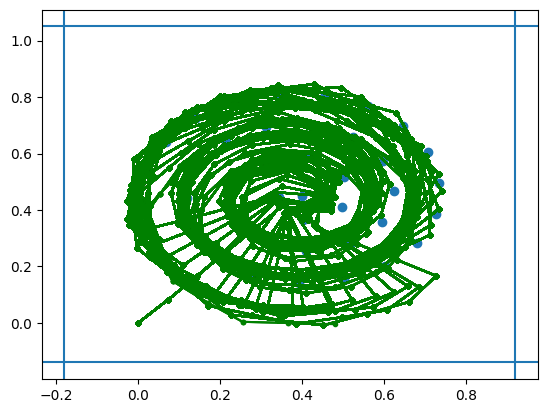

In [41]:
vlp_model = vlp.load_vlp_models()['high_acc']
rnn_mod = load_model(MODELS_DIR / 'navigation_neural_nets/rnn.keras') 

live_ekf = load_ekf()

df = init_df()

plt.figure()
tar_pattern = gen_tar_pattern()
plot_pattern(tar_pattern)


all_targets = np.tile(tar_pattern, (300, 1))
for reading in range(len(all_targets)):
    target = all_targets[reading]
    print('moving to target: ',reading, ' at: ',target)
    tar_x= target[0]
    tar_y = target[1]

    nav_to_point(tar_x, tar_y)

    plot_path(df['real_x'],df['real_y'])


In [39]:
read_vive_gt()

(np.float64(0.0002218248866200104),
 np.float64(-0.0017202697678403989),
 np.float64(-0.1459586958193313))

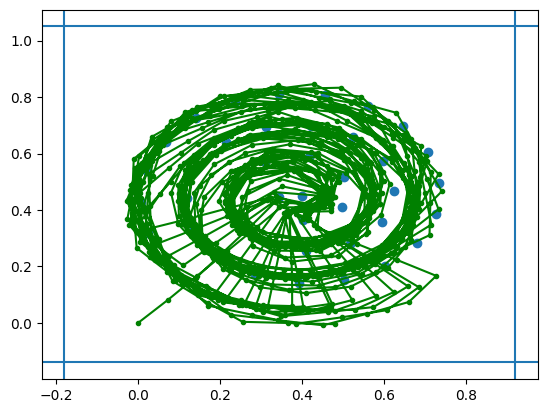

In [42]:
plt.figure()
plot_pattern(tar_pattern)
plot_path(df['real_x'],df['real_y'])
# plot_path(df['encoder_x'],df['encoder_y'])

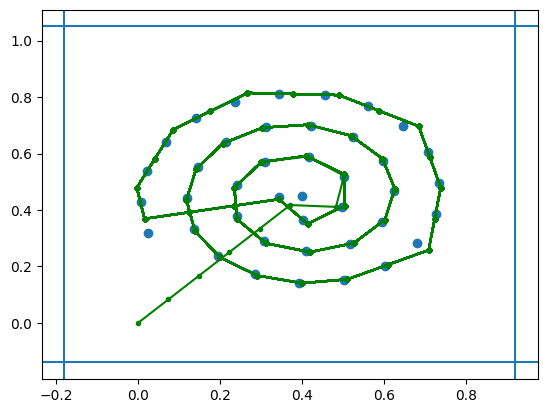

In [43]:
plt.figure()
plot_pattern(tar_pattern)
plot_path(df['encoder_x'],df['encoder_y'])

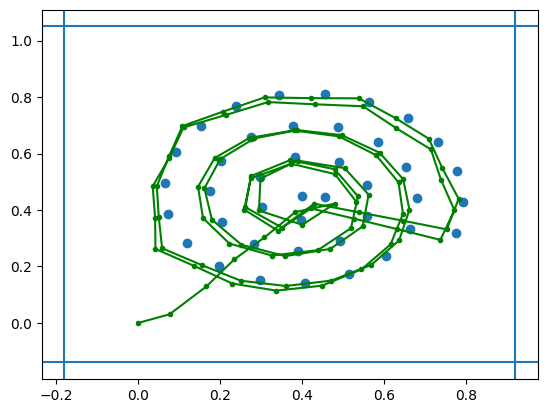

In [25]:
plt.figure()
plot_pattern(tar_pattern)
plot_path(df['ekf_x'],df['ekf_y'])

In [44]:
df.to_csv('encoder_ccw_spiral_in_out_run.csv')

In [114]:
encoder_run_df =  pd.read_csv('encoder_eight_run.csv')
encoder_errs = np.sqrt((np.square(encoder_run_df['ekf_x'] - encoder_run_df['real_x']) + np.square(encoder_run_df['ekf_y'] - encoder_run_df['real_y']))[1:].to_list())
encoder_ang_errs = c.normalize_angle((encoder_run_df['encoder_heading'] - encoder_run_df['real_heading']).to_list())


ekf_run_df = pd.read_csv('ekf_eight_run.csv')
ekf_errs = np.sqrt((np.square(ekf_run_df['ekf_x'] - ekf_run_df['real_x']) + np.square(ekf_run_df['ekf_y'] - ekf_run_df['real_y']))[1:].to_list())
ekf_ang_errs = c.normalize_angle((ekf_run_df['ekf_heading'] - ekf_run_df['real_heading']).to_list())


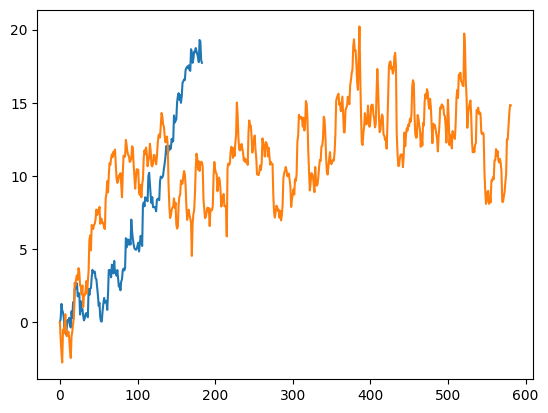

In [115]:
plt.plot(encoder_ang_errs)
plt.plot(ekf_ang_errs)

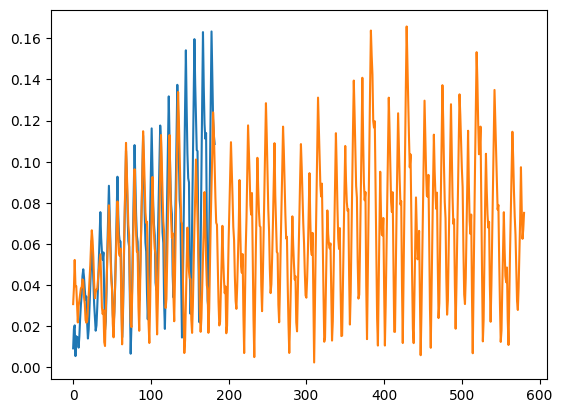

In [116]:
plt.plot(encoder_errs)
plt.plot(ekf_errs)

# CNC control

In [57]:
# com_port = '/dev/tty.usbserial-A505I3Q9'  # Update with your sensor's COM port
com_port = 'COM7'  # Update with your sensor's COM port
cnc_serial = serial.Serial(com_port, 115200)
c.init_cnc(cnc_serial)
   

In [36]:
cnc_serial.close()

In [5]:
c.absolute_movement(0, 0, cnc_serial)

Sending command: G1 X0 Y0 F1000
GRBL Response:  ok


In [55]:
adc = c.read_n_vlp(10)

taking vlp readings:  0 1 2 3 4 5 6 7 8 9 

(array([ 11.,  70., 123.,  59.,   9.,  17.,  57., 113.,  27.,  26.]),
 array([   0. ,  397.6,  795.2, 1192.8, 1590.4, 1988. , 2385.6, 2783.2,
        3180.8, 3578.4, 3976. ]),
 <BarContainer object of 10 artists>)

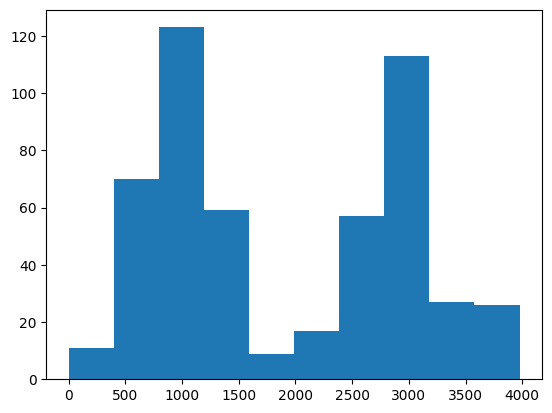

In [39]:
plt.hist(adc[4])

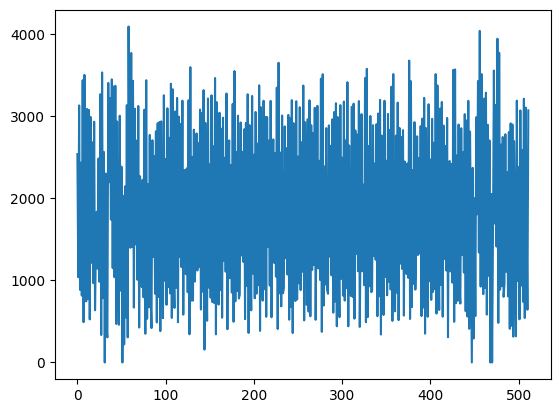

In [40]:
plt.plot(adc[6])

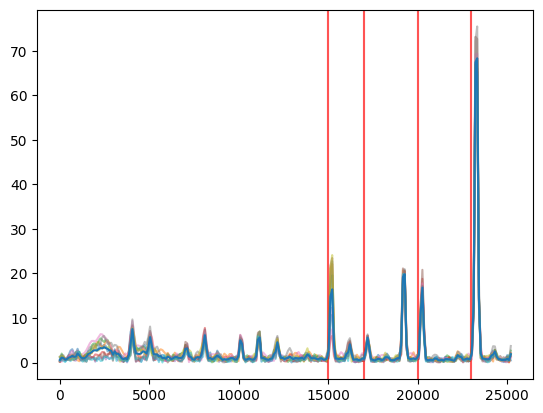

In [9]:
fft_lst = []
for i in range (10):
    t = np.array(adc)[i]
    fft, fre = c.FFT_win(t)
    fft_lst.append(fft)
    plt.plot(fre, fft, alpha = 0.5)

    
    for l in [15000, 17000, 20000, 23000]:
        plt.axvline(l, c = 'r', alpha = 0.1)

plt.plot(fre, np.mean(fft_lst, axis = 0))

In [242]:
# vive = c.vive_setup()
# print(c.read_vive(vive, n_readings= 10) ) #test



In [58]:
log_file = 'cnc_fingerprint_02.csv'
c.cnc_log_clear(log_file)

In [105]:
# Main functionality

scan_points = c.generate_scan_points(step=25)


In [49]:
import numpy as np

def generate_scan_points(step=50, width=900, height=1000):
    """
    Generates a set of coordinate points to scan over a 2D area with a zigzag pattern,
    with each point randomly offset by a uniform distribution in positive directions only,
    while ensuring that no point exceeds the boundaries of the width and height,
    and that both x and y values are greater than 0.
    """
    points = []
    
    for y in range(step, height, step):  # Start from 'step' to avoid y = 0
        if y % (2 * step) == 0:
            # Move left to right
            row_points = [(x, y) for x in range(step, width, step)]  # Start from 'step' to avoid x = 0
        else:
            # Move right to left
            row_points = [(x, y) for x in range(width - step, 0, -step)]  # Start from 'width - step'
        
        # Apply random offset to each point, ensuring the point stays within bounds
        for i, (x, y) in enumerate(row_points):
            # Generate random offsets between 0 and step (positive only)
            offset_x = np.random.uniform(0, min(step, width - x))  # Ensure x stays within width
            offset_y = np.random.uniform(0, min(step, height - y))  # Ensure y stays within height
            # Apply offset and store the new point
            points.append((x + offset_x, y + offset_y))
    
    return np.array(points)


scan_points = generate_scan_points(step = 40, width = 900, height = 1000)

In [59]:
scan_points = generate_scan_points(step = 40, width = 900, height = 1000)

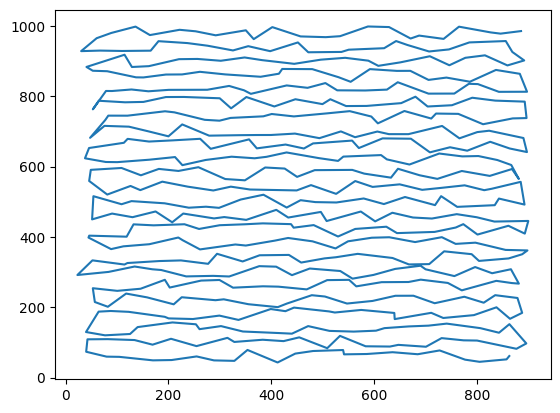

In [51]:
plt.plot(scan_points[:,0], scan_points[:,1])

In [60]:
scan_points[0]

array([883.09054677,  53.45977066])

In [61]:
c.absolute_movement(883, 53, cnc_serial)
time.sleep(6)
print('times up')

Sending command: G1 X883 Y53 F1000
GRBL Response:  ok
times up


In [24]:
len(scan_points)

624

In [62]:
last_position_id = c.get_last_logged_point(log_file)

# Determine starting point
start_index = last_position_id + 1  # Start from the next point
if start_index == 0:
    c.cnc_log_clear(log_file)  # If no valid log file exists, clear and initialize log

# Resume data collection
for i in range(start_index, len(scan_points)):
    x, y = scan_points[i]
    # Move to the point (you should implement `absolute_movement`)
    c.absolute_movement(x, y,cnc_serial)
    print(f'Moving to {x},{y}')
    time.sleep(6)  # Wait to stabilize sensors

    # Collect data (mock example)
    for _ in range(5):
        try:
            vive_data = c.read_vive(vive)
            break
        except:
            pass
    vive_data = " "
    # vlp_data, _ = c.take_mean_fft(10)
    vlp_data = c.read_n_vlp(10)
    
    # Log the data
    c.cnc_log_write(log_file, i, x, y, vive_data, vlp_data)

Sending command: G1 X883.0905467678173 Y53.459770656489965 F1000
GRBL Response:  ok
Moving to 883.0905467678173,53.459770656489965
taking vlp readings:  0 1 2 3 4 5 6 7 8 9 Sending command: G1 X839.8517022436553 Y57.76769011097293 F1000
GRBL Response:  ok
Moving to 839.8517022436553,57.76769011097293
taking vlp readings:  0 1 2 3 4 5 6 7 8 9 Sending command: G1 X788.9226638862432 Y45.46491701438464 F1000
GRBL Response:  ok
Moving to 788.9226638862432,45.46491701438464
taking vlp readings:  0 1 2 3 4 5 6 7 8 9 Sending command: G1 X751.3279138035449 Y63.31900220818741 F1000
GRBL Response:  ok
Moving to 751.3279138035449,63.31900220818741
taking vlp readings:  0 1 2 3 4 5 6 7 8 9 Sending command: G1 X711.6693799226786 Y59.34456897325507 F1000
GRBL Response:  ok
Moving to 711.6693799226786,59.34456897325507
taking vlp readings:  0 1 2 3 4 5 6 7 8 9 Sending command: G1 X697.9468534948784 Y68.51274611698946 F1000
GRBL Response:  ok
Moving to 697.9468534948784,68.51274611698946
taking vlp rea

## vive pose transform

In [2]:
import numpy as np
from scipy.spatial.transform import Rotation as R
from scipy.optimize import minimize

class OrientationTransformer:
    def __init__(self):
        self.transform_matrix = None

    def build_transform(self, raw_points, desired_points):
        """
        Builds the transformation matrix to convert raw yaw, pitch, roll to the desired reference frame.

        Parameters:
        raw_points (list of list of float): A list of N arrays, each representing [yaw, pitch, roll] in the raw frame.
        desired_points (list of list of float): A list of N arrays, each representing [yaw, pitch, roll] in the desired frame.
        """
        if len(raw_points) != len(desired_points):
            raise ValueError("Number of raw points and desired points must match.")

        def cost_function(transform_vector):
            # Transform vector defines a rotation matrix via Euler angles
            transform_rotation = R.from_euler('zyx', transform_vector, degrees=True).as_matrix()
            total_error = 0

            for raw, desired in zip(raw_points, desired_points):
                raw_rotation = R.from_euler('zyx', raw, degrees=True).as_matrix()
                desired_rotation = R.from_euler('zyx', desired, degrees=True).as_matrix()

                # Apply transformation
                transformed_rotation = np.dot(transform_rotation, raw_rotation)

                # Compute error
                error_matrix = np.dot(desired_rotation.T, transformed_rotation)
                angle_error = R.from_matrix(error_matrix).magnitude()
                total_error += angle_error**2

            return total_error

        # Optimize the transform vector (initial guess is [0, 0, 0])
        result = minimize(cost_function, [0, 0, 0], bounds=[(-180, 180), (-180, 180), (-180, 180)])

        if not result.success:
            raise RuntimeError("Optimization failed to find a valid transform.")

        # Save the resulting transformation matrix
        self.transform_matrix = R.from_euler('zyx', result.x, degrees=True).as_matrix()

    def transform(self, raw_orientation):
        """
        Transforms a raw [yaw, pitch, roll] orientation to the desired reference frame.

        Parameters:
        raw_orientation (list of float): An array representing [yaw, pitch, roll] in the raw frame.

        Returns:
        list of float: Transformed [yaw, pitch, roll] in the desired reference frame.
        """
        if self.transform_matrix is None:
            raise ValueError("Transformation matrix has not been built. Call build_transform first.")

        # Convert raw orientation to rotation matrix
        raw_rotation = R.from_euler('zyx', raw_orientation, degrees=True).as_matrix()

        # Apply the transformation
        transformed_rotation = np.dot(self.transform_matrix, raw_rotation)

        # Convert back to yaw, pitch, roll
        transformed_euler = R.from_matrix(transformed_rotation).as_euler('zyx', degrees=True)

        return transformed_euler.tolist()

# Suggested calibration points for yaw with zero pitch and roll (desired frame)
def generate_calibration_points():
    yaw_values = [0, 45, 90, 135, 180, -135, -90, -45]
    raw_points = []
    desired_points = []

    for yaw in yaw_values:
        raw_points.append([yaw + np.random.uniform(-5, 5), np.random.uniform(-2, 2), np.random.uniform(-2, 2)])
        desired_points.append([yaw, 0, 0])

    return raw_points, desired_points




In [3]:
raw_calibration_points, desired_calibration_points = generate_calibration_points()

In [4]:
raw_calibration_points

[[-1.4486288969825, -0.8592204717742087, -0.8234303617341321],
 [49.65097076823027, -1.6437974080380395, -1.7831470605821607],
 [93.22230889505094, -0.34679139351794674, 0.7685642263929244],
 [136.78707410009068, 1.6876620878914528, -0.8312794863740725],
 [179.5274504261781, -1.564160938331658, 1.4847490934952168],
 [-139.61393275592818, -1.3056471509214091, -0.915266895620165],
 [-89.93398026325974, -0.2730123518970533, 1.1827420221134681],
 [-49.91980055904709, -1.384853678111647, -0.6276115190718934]]

In [ ]:
# Example usage:
# Define raw and desired calibration points (yaw, pitch, roll in degrees)


transformer = OrientationTransformer()
transformer.build_transform(raw_calibration_points, desired_calibration_points)

# Transform a new raw orientation
raw_orientation = [60, 1, 1]
transformed_orientation = transformer.transform(raw_orientation)
print("Transformed orientation:", transformed_orientation)

In [ ]:
vive = c.vive_setup()

c.read_vive(vive)[:3]

In [ ]:
c.average_vive_readings(c.read_vive(vive))

np.float64(0.6687380194664001)

In [69]:
pose3 = np.apply_along_axis(c.average_vive_readings, 0 ,  np.array(c.read_vive(vive)))[3:]

In [70]:
raw_calibration_points = np.array([pose1, pose2, pose3])

In [ ]:
from scipy.spatial.transform import Rotation as R

class ViveToRobotTransform:
    # ... [existing methods unchanged]

    def transform_orientation(self, yaw_pitch_roll):
        """
        Transform a yaw, pitch, roll orientation from tracker frame to room frame.

        Parameters:
        yaw_pitch_roll (list of float): [yaw, pitch, roll] in the tracker reference frame.

        Returns:
        list of float: [yaw, pitch, roll] in the room reference frame.
        """
        if self.transformation_matrix is None:
            raise ValueError("Transformation not yet derived. Call `derive_transform` first.")

        # Convert yaw, pitch, roll to rotation matrix
        raw_rotation = R.from_euler('zyx', yaw_pitch_roll, degrees=True).as_matrix()

        # Apply the positional transformation to the rotation matrix
        transformed_rotation = self.transformation_matrix[:3, :3] @ raw_rotation

        # Convert back to yaw, pitch, roll
        transformed_euler = R.from_matrix(transformed_rotation).as_euler('zyx', degrees=True)

        return transformed_euler.tolist()


Transformed orientation: [160.22989873661334, -61.5708115771416, -31.08009833933425]


In [72]:
raw_lst = []
tra_lst = []

[ -0.33719857 -29.03383401  90.43535076]
[6.065839706020269, 1.6270964944398643, -14.122116045113465]


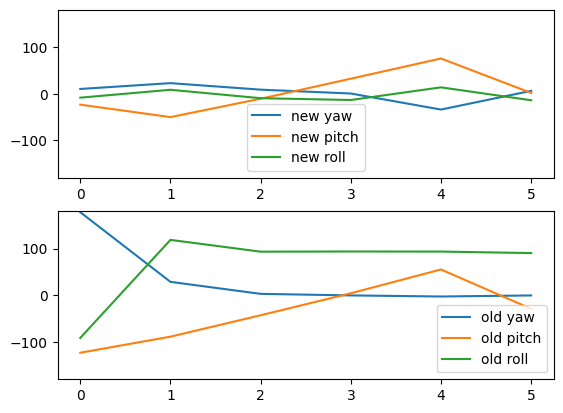

: 

In [ ]:


raw_pose = np.apply_along_axis(c.average_vive_readings, 0 ,  np.array(c.read_vive(vive)))[3:]
trans_pose = transformer.transform(raw_pose)
print(raw_pose)
print(trans_pose)
raw_lst.append(raw_pose)
tra_lst.append(trans_pose)

plt.figure()
ax1 = plt.subplot(212)
ax1.plot(np.array(raw_lst)[:,0], label = 'old yaw')
ax1.plot(np.array(raw_lst)[:,1], label = 'old pitch')
ax1.plot(np.array(raw_lst)[:,2], label = 'old roll')

ax2 = plt.subplot(211)
ax2.plot(np.array(tra_lst)[:,0], label = 'new yaw')
ax2.plot(np.array(tra_lst)[:,1], label = 'new pitch')
ax2.plot(np.array(tra_lst)[:,2], label = 'new roll')
ax1.set_ylim(-180,180)
ax2.set_ylim(-180, 180)
ax1.legend()
ax2.legend()
